In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('../bin/data.csv')

df.head(10)

,provincia,marca_modelo,fecha_matriculacion,kilometraje,nombre_vendedor,tipo_vendedor,distintivo_ambiental,garantia,precio_contado,precio_nuevo,largo,ancho,alto,capacidad_maletero,carroceria,num_plazas,batalla,peso,num_puertas,consumo_medio,consumo_carretera,consumo_urbano,CO2,deposito,combustible,cilindros,cilindrada,sobrealimentacion,tipo_cambio,traccion,num_marchas,potencia_kw,potencia_cv,par,velocidad_max,aceleracion
0,Vizcaya,Detalles PORSCHE 911 (2020),Matriculado: 05/2020,21500,CENTRO PORSCHE BILBAO,Profesional,C,12 meses,135100 135700 0%,158158,4519 mm Largo,1852 mm Ancho,1297 mm Alto,Capacidad del maletero (l)132/0,CarroceríaConvertible,Número de plazas4,Batalla (mm)\r\n2.450,Peso/Masa max. autorizado (kg)2.015,Número de puertas2,"Consumo medio 9,60 litros/100 km","Consumo en carretera 7,60 litros/100 km","Consumo urbano 12,90 litros/100 km",CO2 (g/km) 218 g/km,"Depósito de combustible (l) 64,00 litros",Combustible Gasolina,Nº de cilindros 6 cilindros,Cilindrada (cm3) 2.981,Sobrealimentación Doble turbo,Tipo de transmisión Automática secuencial,TracciónTracción trasera,Número de marchas8,Potencia (KW)283,Potencia (CV)385,Par (Nm)450,Velocidad máxima (km/h)291,"Aceleración 0-100 km/h (s)4,40"
1,Vizcaya,Detalles PORSCHE Panamera (2024),Matriculado: 06/2024,10000,CENTRO PORSCHE BILBAO,Profesional,0 EMISIONES,24 meses,205700,204516,5054 mm Largo,1937 mm Ancho,1421 mm Alto,Capacidad del maletero (l)421/1.255,CarroceríaBerlina,Número de plazas4,Batalla (mm)\r\n2.950,Peso/Masa max. autorizado (kg)2.830,Número de puertas5,"Consumo medio 2,10 litros/100 km",Consumo en carreteralitros/100 km,Consumo urbanolitros/100 km,CO2 (g/km) 47 g/km,"Depósito de combustible (l) 80,00 litros",Combustible Gasolina y corriente eléctrica,Nº de cilindros 8 cilindros,Cilindrada (cm3) 3.996,Sobrealimentación Turbo de geometría variable,Tipo de transmisión Automática secuencial,TracciónTracción total permanente,Número de marchas8,Potencia (KW)500,Potencia (CV)680,Par (Nm)930,Velocidad máxima (km/h)315,"Aceleración 0-100 km/h (s)3,20"
2,Sevilla,Detalles DACIA Sandero (2017),Matriculado: 12/2017,124000,DURMOVIL,Profesional,C,12 meses,9499,9696,4069 mm Largo,1733 mm Ancho,1519 mm Alto,Capacidad del maletero (l)320/0,CarroceríaBerlina,Número de plazas5,Batalla (mm)\r\n2.589,Peso/Masa max. autorizado (kg)1.652,Número de puertas5,"Consumo medio 3,50 litros/100 km","Consumo en carretera 3,40 litros/100 km","Consumo urbano 3,70 litros/100 km",CO2 (g/km) 90 g/km,"Depósito de combustible (l) 50,00 litros",Combustible Diesel,Nº de cilindros 4 cilindros,Cilindrada (cm3) 1.461,Sobrealimentación Turbo,Tipo de transmisión Manual,TracciónTracción delantera,Número de marchas5,Potencia (KW)55,Potencia (CV)75,Par (Nm)200,Velocidad máxima (km/h)164,"Aceleración 0-100 km/h (s)14,60"
3,Barcelona,Detalles VOLKSWAGEN T-Roc (2024),Matriculado: 01/2024,10,Volkswagen Vilamòbil,Profesional,C,24 meses,33900,no disponible,NaN,NaN,NaN,NaN,"4x4, SUV o pickup",NaN,NaN,NaN,5 Puertas,NaN,NaN,NaN,NaN,NaN,Gasolina,NaN,NaN,NaN,Automático,NaN,NaN,NaN,150,NaN,NaN,NaN
4,Málaga,Detalles CITROEN C3 (2020),Matriculado: 10/2020,60000,MARBESOL,Profesional,C,12 meses,11190,15700,3996 mm Largo,1749 mm Ancho,1474 mm Alto,Capacidad del maletero (l)300/0,CarroceríaBerlina,Número de plazas5,Batalla (mm)\r\n2.539,Peso/Masa max. autorizado (kg)1.550,Número de puertas5,"Consumo medio 4,70 litros/100 km","Consumo en carretera 4,10 litros/100 km","Consumo urbano 5,70 litros/100 km",CO2 (g/km) 96 g/km,"Depósito de combustible (l) 45,00 litros",Combustible Gasolina,Nº de cilindros 3 cilindros,Cilindrada (cm3) 1.199,Sobrealimentación Turbo,Tipo de transmisión Manual,TracciónTracción delantera,Número de marchas5,Potencia (KW)60,Potencia (CV)82,Par (Nm)118,Velocidad máxima (km/h)168,"Aceleración 0-100 km/h (s)13,00"
5,Pontevedra,Detalles SKODA Kamiq (2023),Matriculado: 05/2023,23161,SUZUKI SKODA MOURENTE Pontevedra,Profesional,C,Sí,19990,26783,4241 mm Largo,1793 mm Ancho,1553 mm Alto,Capacidad del maletero (

In [3]:
df.columns

Index(['provincia', 'marca_modelo', 'fecha_matriculacion', 'kilometraje',
       'nombre_vendedor', 'tipo_vendedor', 'distintivo_ambiental', 'garantia',
       'precio_contado', 'precio_nuevo', 'largo', 'ancho', 'alto',
       'capacidad_maletero', 'carroceria', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'CO2', 'deposito', 'combustible', 'cilindros', 'cilindrada',
       'sobrealimentacion', 'tipo_cambio', 'traccion', 'num_marchas',
       'potencia_kw', 'potencia_cv', 'par', 'velocidad_max', 'aceleracion'],
      dtype='object')

In [4]:
df['kilometraje'].dtype == 'int64'

True

In [5]:
df.shape

(80, 36)

In [6]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

provincia                0.00
marca_modelo             0.00
fecha_matriculacion      0.00
kilometraje              0.00
nombre_vendedor          0.00
tipo_vendedor            0.00
distintivo_ambiental     0.00
garantia                 0.00
precio_contado           0.00
precio_nuevo             0.00
largo                   20.00
ancho                   20.00
alto                    20.00
capacidad_maletero      20.00
carroceria               0.00
num_plazas              13.75
batalla                 20.00
peso                    12.50
num_puertas              0.00
consumo_medio           13.75
consumo_carretera       15.00
consumo_urbano          15.00
CO2                     21.25
deposito                20.00
combustible              0.00
cilindros               20.00
cilindrada              10.00
sobrealimentacion       20.00
tipo_cambio              0.00
traccion                20.00
num_marchas             16.25
potencia_kw             20.00
potencia_cv              0.00
par       

In [7]:
df = df.dropna(subset=['precio_contado'])

In [8]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

provincia                0.00
marca_modelo             0.00
fecha_matriculacion      0.00
kilometraje              0.00
nombre_vendedor          0.00
tipo_vendedor            0.00
distintivo_ambiental     0.00
garantia                 0.00
precio_contado           0.00
precio_nuevo             0.00
largo                   20.00
ancho                   20.00
alto                    20.00
capacidad_maletero      20.00
carroceria               0.00
num_plazas              13.75
batalla                 20.00
peso                    12.50
num_puertas              0.00
consumo_medio           13.75
consumo_carretera       15.00
consumo_urbano          15.00
CO2                     21.25
deposito                20.00
combustible              0.00
cilindros               20.00
cilindrada              10.00
sobrealimentacion       20.00
tipo_cambio              0.00
traccion                20.00
num_marchas             16.25
potencia_kw             20.00
potencia_cv              0.00
par       

In [9]:
df.shape

(80, 36)

In [10]:
df['tipo_cambio'].unique()

array(['Tipo de transmisión Automática secuencial',
       'Tipo de transmisión Manual', 'Automático',
       'Tipo de transmisión Directo, sin caja de cambios', 'Manual'],
      dtype=object)

In [11]:
df['tipo_cambio'] = df['tipo_cambio'].apply(lambda x: 'Automático' if 'Automátic' in x else 'Manual')

In [12]:
df['carroceria'].unique()

array(['CarroceríaConvertible', 'CarroceríaBerlina', '4x4, SUV o pickup',
       'CarroceríaTodo Terreno', 'CarroceríaStationwagon',
       'CarroceríaMonovolumen', 'CarroceríaCoupe',
       'Berlina mediana o grande'], dtype=object)

In [13]:
df["carroceria"] = df["carroceria"].str.replace("Carrocería","")

In [14]:
df["combustible"] = df["combustible"].str.replace("combustible ","").str.replace("Combustible ","")

In [15]:
df['fecha_matriculacion'] = df['fecha_matriculacion'].str.split("Matriculado: ").str[1]

def limpiar_fecha(fecha):
    try:
        mes, ano = fecha.split('/')
        return int(mes), int(ano)
    except:
        return np.nan, int(fecha)

df[['mes_matriculacion', 'ano_matriculacion']] = df['fecha_matriculacion'].apply(lambda x: pd.Series(limpiar_fecha(x)))

In [16]:
df = df.drop(columns=['fecha_matriculacion'])

In [17]:
df['ano_matriculacion']=df['ano_matriculacion'].astype('int64')

In [18]:
df['mes_matriculacion']=df['mes_matriculacion'].astype('int64')

In [19]:
df = df[df["tipo_vendedor"] == "Profesional"]
df = df.drop(columns=['tipo_vendedor'])

In [20]:
df["garantia"] = df["garantia"].str.split(' ').str[0].replace("Sí",np.nan).replace("No",0).astype(float)

In [21]:
df["precio_contado"] = pd.to_numeric(df["precio_contado"], errors='coerce')

In [22]:
df["precio_nuevo"] = pd.to_numeric(df["precio_nuevo"], errors='coerce')

In [23]:
df["largo"] = df["largo"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [24]:
df["ancho"] = df["ancho"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [25]:
df["alto"] = df["alto"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [26]:
df["capacidad_maletero"] = df["capacidad_maletero"].str.split(")").str[1].str.split("/").str[0].astype(float)

In [27]:
df["num_plazas"] = df["num_plazas"].str.split("s").str[1].astype(float)

In [28]:
df["batalla"] = df["batalla"].str.extract(r'(\d+\.\d+)').replace(".","").astype(float)

In [29]:
df["peso"] = df["peso"].str.extract(r'(\d+\.\d+)').replace(".","").astype(float)

In [30]:
df["num_puertas"] = df["num_puertas"].str.extract(r'(\d+)').astype(int)

In [31]:
df["consumo_medio"] = df["consumo_medio"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)

In [32]:
df["consumo_carretera"] = df["consumo_carretera"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)

In [33]:
df["consumo_urbano"] = df["consumo_urbano"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)

In [34]:
df["co2"] = df["CO2"].str.extract(r'(\d{1,3})(?= g/km)')[0].astype(float)

In [35]:
df["deposito"] = df["deposito"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)

In [36]:
df["num_cilindros"] = df["cilindros"].str.extract(r'(\d+)').astype(float)

In [37]:
df["cilindrada"] = df["cilindrada"].str.extract(r'(\d+,\d+|\d+\.\d+)').replace(',', '.', regex=True).astype(float)

In [38]:
df["num_marchas"] = df["num_marchas"].str.extract(r'(\d+)').astype(float)

In [39]:
df["potencia_kw"] = df["potencia_kw"].str.extract(r'(\d+)').astype(float)

In [40]:
df["potencia_cv"] = df["potencia_cv"].str.extract(r'(\d+)').astype(float)

In [41]:
df["par"] = df["par"].str.extract(r'(\d+)').astype(float)

In [42]:
df["velocidad_max"] = df["velocidad_max"].str.extract(r'(\d+)').astype(float)

In [43]:
df["aceleracion"] = df["aceleracion"].str.extract(r'(\d+,\d+|\d+\.\d+)')[0].str.replace(",", ".").astype(float)

In [44]:
marca_listado = pd.read_csv('../bin/listado_marcas.csv')

#La lista de marcas no está en mayúsculas pero en "data" sí. Hay que convertir todo a mayúsculas
lista_marcas = [marca.upper() for marca in marca_listado['nombre_marca'].tolist()]

df['marca_modelo'] = df['marca_modelo'].str.replace("Detalles ", "").str.strip().str.upper()

#En la línea de abajo, "next" busca el siguiente elemento de la lista para comprobar que coincide
df['marca'] = df['marca_modelo'].apply(lambda x: next((marca for marca in lista_marcas if marca in x), np.nan))
df['modelo'] = df.apply(lambda x: x['marca_modelo'].replace(x['marca'], "").strip(" ()") if x['marca'] else x['marca_modelo'], axis=1)


In [45]:
df = df.drop(columns=['marca_modelo'])

In [46]:
df.rename(columns={'distintivo_ambiental': 'id_distintivo_ambiental'
                  , 'marca': 'id_marca'
                  , 'modelo': 'id_modelo'
                  , 'nombre_vendedor': 'id_concesionario'
                  , 'provincia': 'id_provincia'
                  , 'carroceria': 'id_carroceria'}, inplace=True)

In [47]:
df.shape

(80, 39)

In [48]:
df.dtypes

id_provincia                object
kilometraje                  int64
id_concesionario            object
id_distintivo_ambiental     object
garantia                   float64
precio_contado             float64
precio_nuevo               float64
largo                      float64
ancho                      float64
alto                       float64
capacidad_maletero         float64
id_carroceria               object
num_plazas                 float64
batalla                    float64
peso                       float64
num_puertas                  int32
consumo_medio              float64
consumo_carretera          float64
consumo_urbano             float64
CO2                         object
deposito                   float64
combustible                 object
cilindros                   object
cilindrada                 float64
sobrealimentacion           object
tipo_cambio                 object
traccion                    object
num_marchas                float64
potencia_kw         

In [49]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continuous_columns = df.select_dtypes(include=['Int64', 'float', 'int']).columns


def metricas (df, columna):
    
    if columna in categorical_columns:
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        sns.countplot(data=df, x=columna)
        plt.title(f'Distribución de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=columna, y='precio_contado')
        plt.title(f'Boxplot de {columna} con precio')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()
    
    elif columna in continuous_columns:

        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 3, 1)
        sns.histplot(df[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        
        
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[columna])
        plt.title(f'Boxplot de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=df[columna], y=df['precio_contado'])
        plt.title(f'Scatterplot de {columna} con precio')
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [50]:
categorical_columns

Index(['id_provincia', 'id_concesionario', 'id_distintivo_ambiental',
       'id_carroceria', 'CO2', 'combustible', 'cilindros', 'sobrealimentacion',
       'tipo_cambio', 'traccion', 'id_marca', 'id_modelo'],
      dtype='object')

In [51]:
len(categorical_columns)

12

In [52]:
continuous_columns

Index(['kilometraje', 'garantia', 'precio_contado', 'precio_nuevo', 'largo',
       'ancho', 'alto', 'capacidad_maletero', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'deposito', 'cilindrada', 'num_marchas', 'potencia_kw', 'potencia_cv',
       'par', 'velocidad_max', 'aceleracion', 'mes_matriculacion',
       'ano_matriculacion', 'co2', 'num_cilindros'],
      dtype='object')

In [53]:
len(continuous_columns)

27

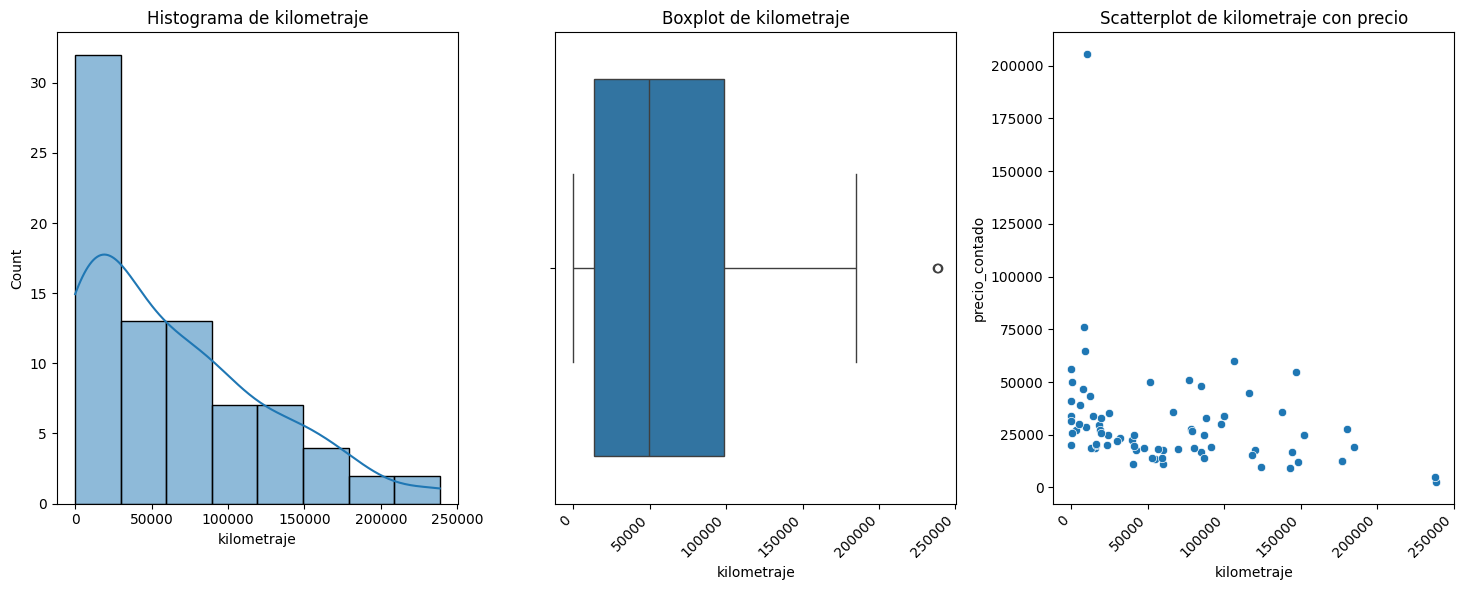

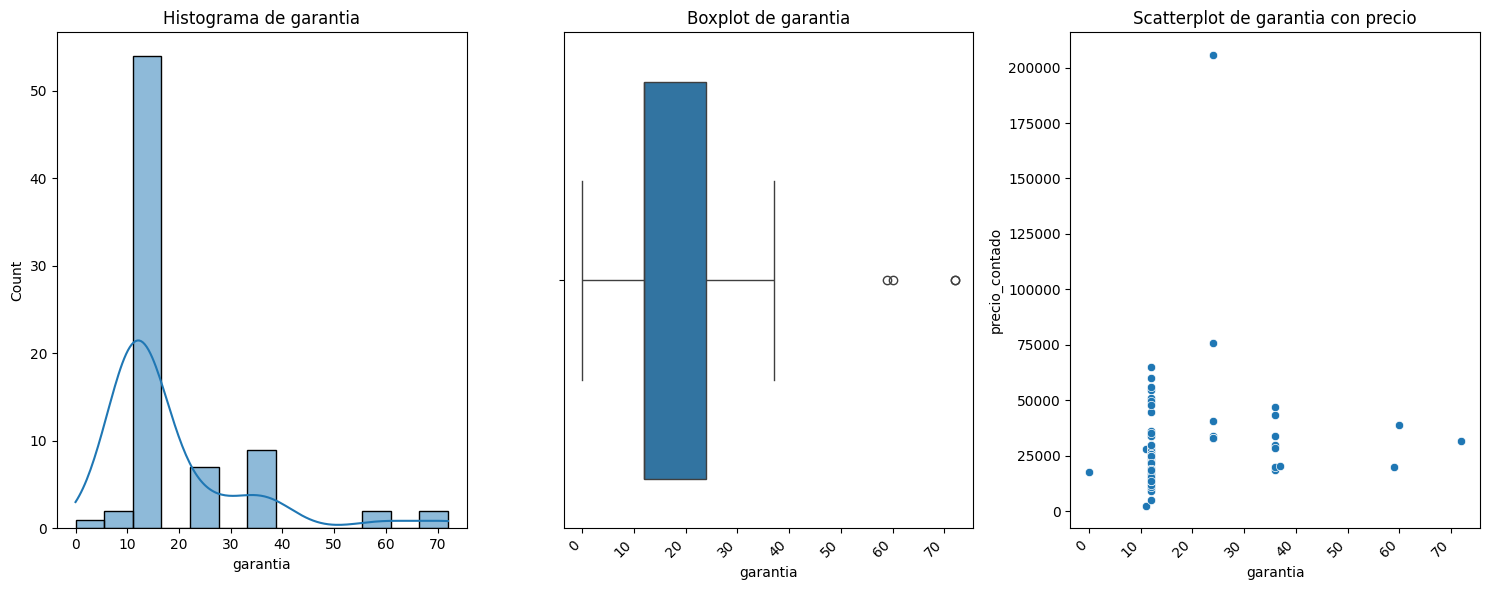

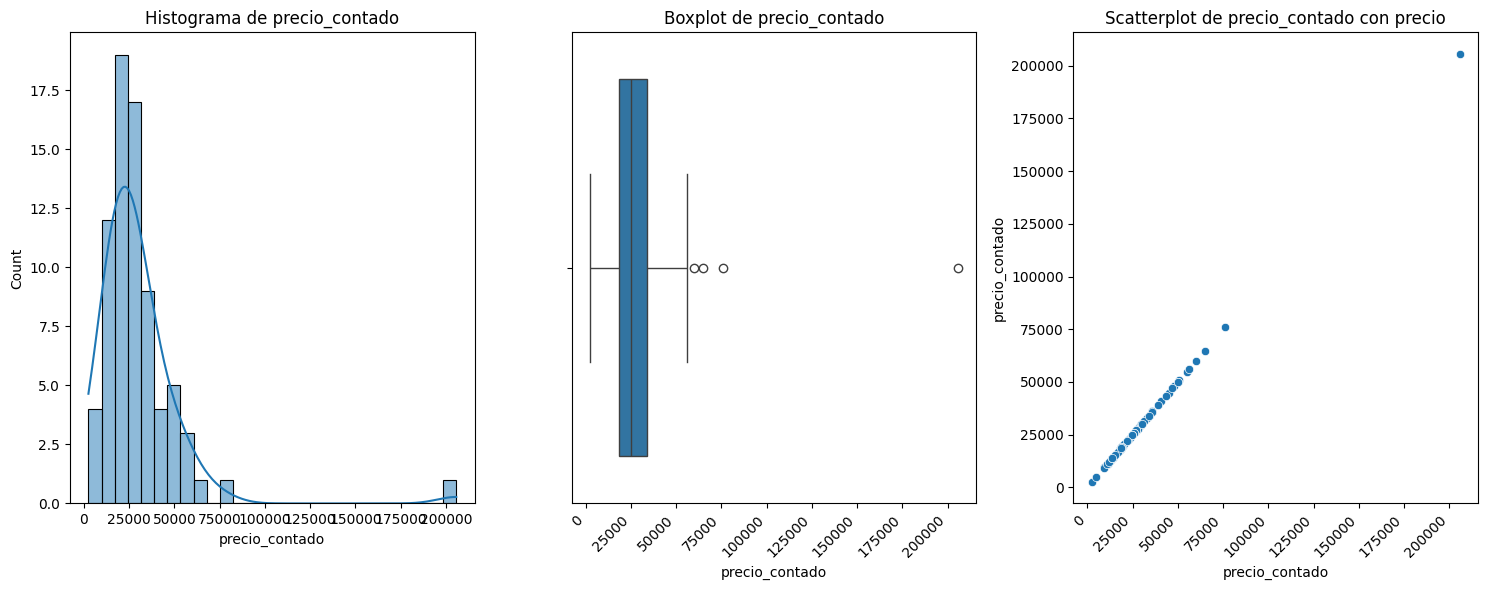

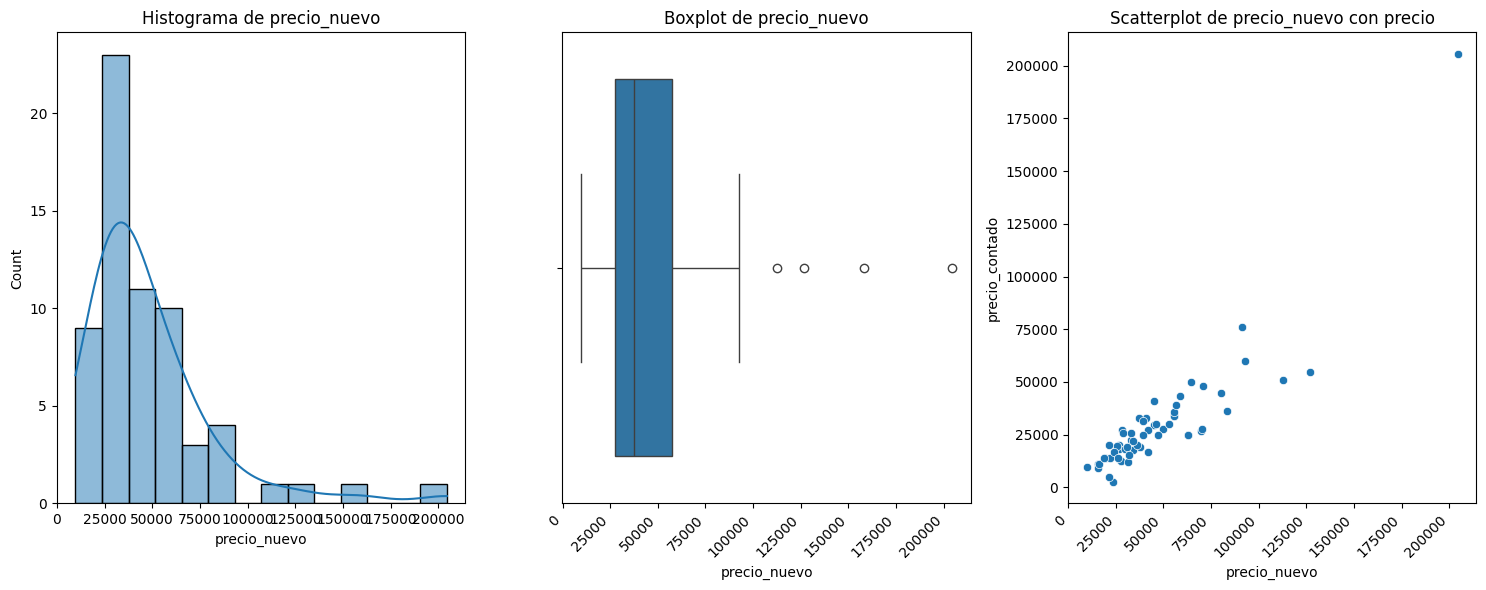

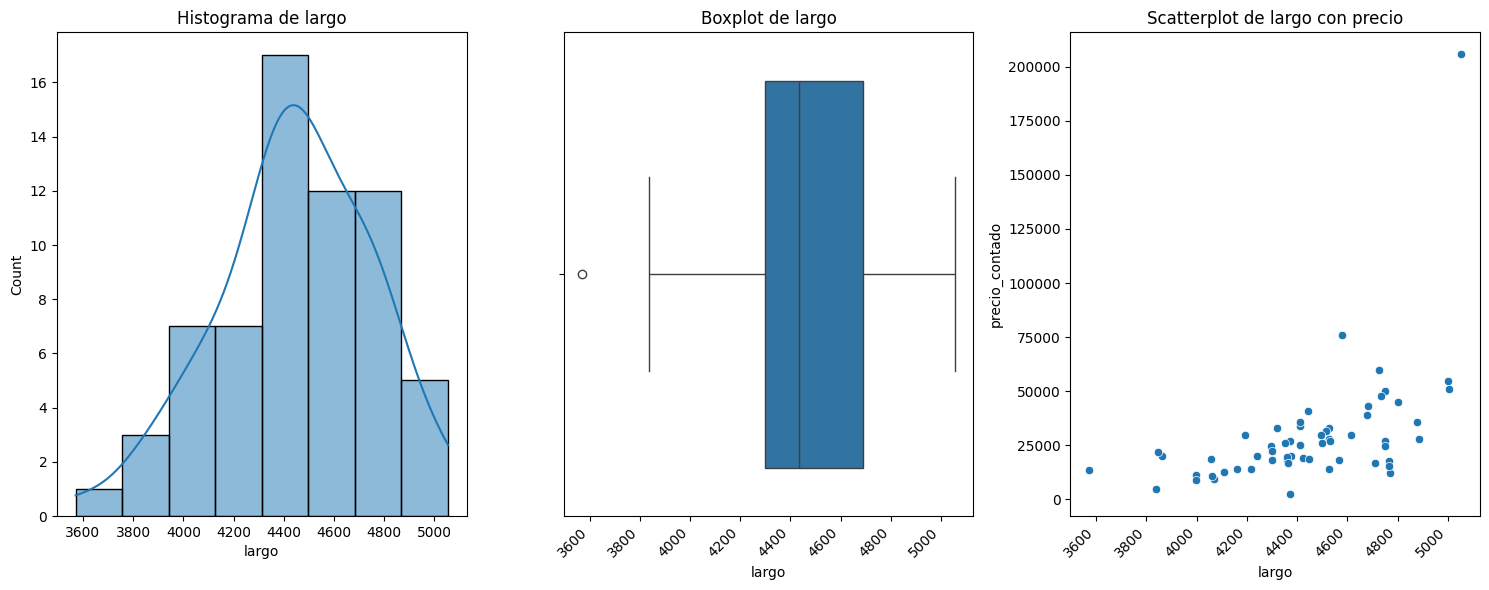

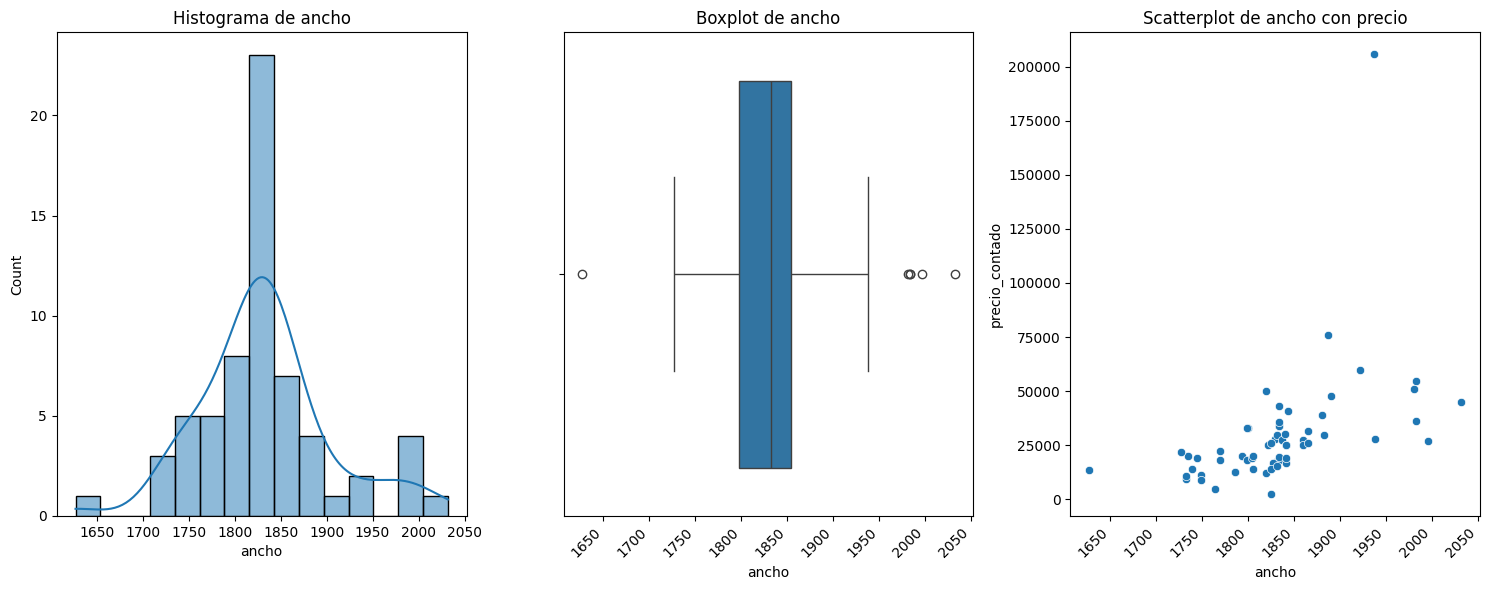

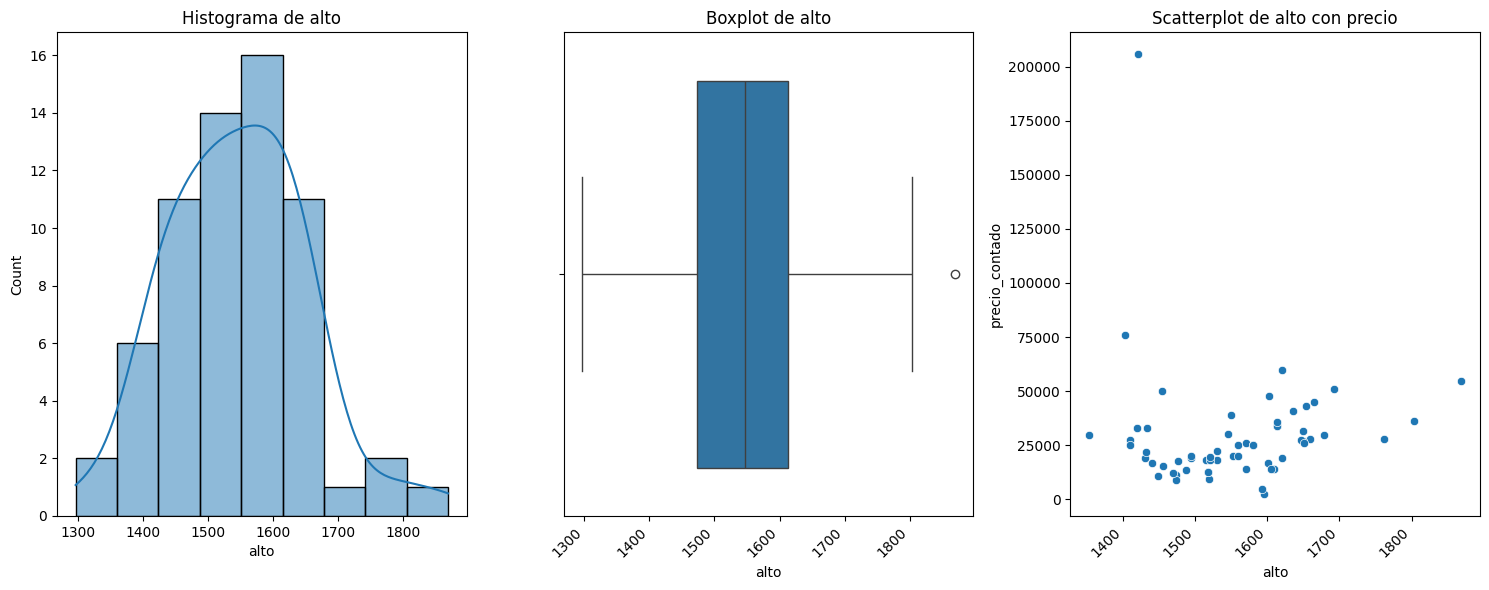

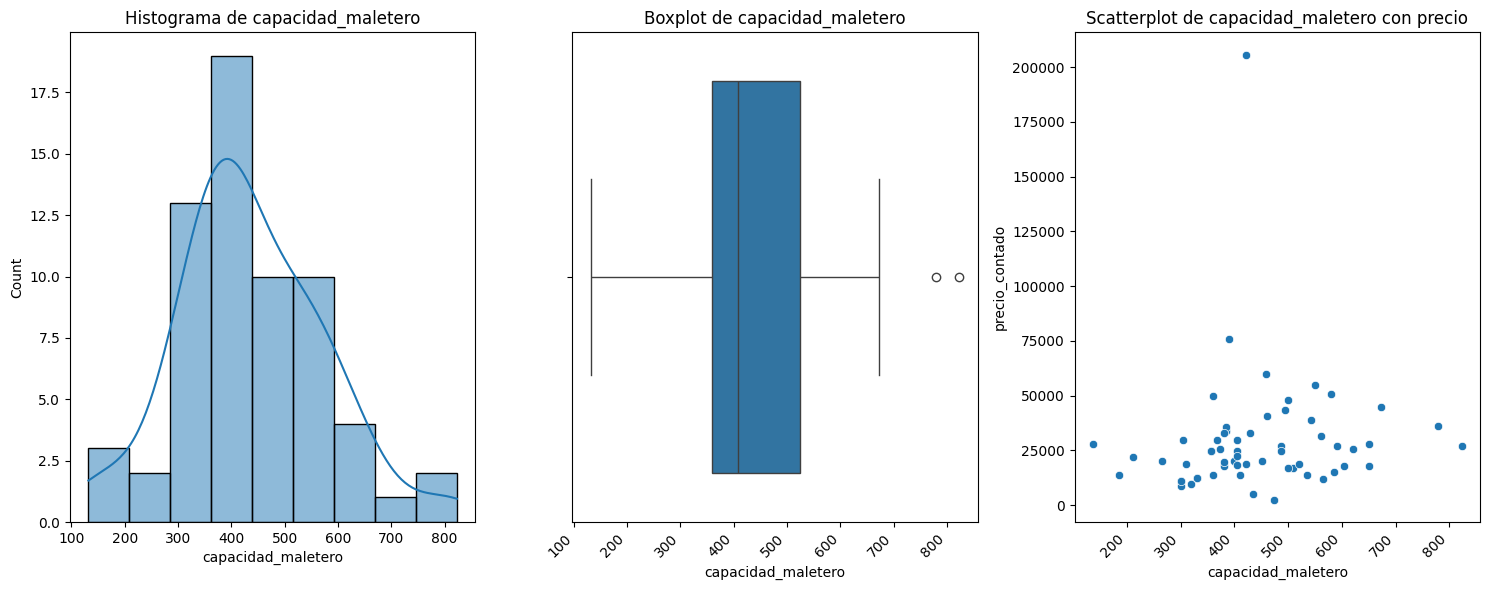

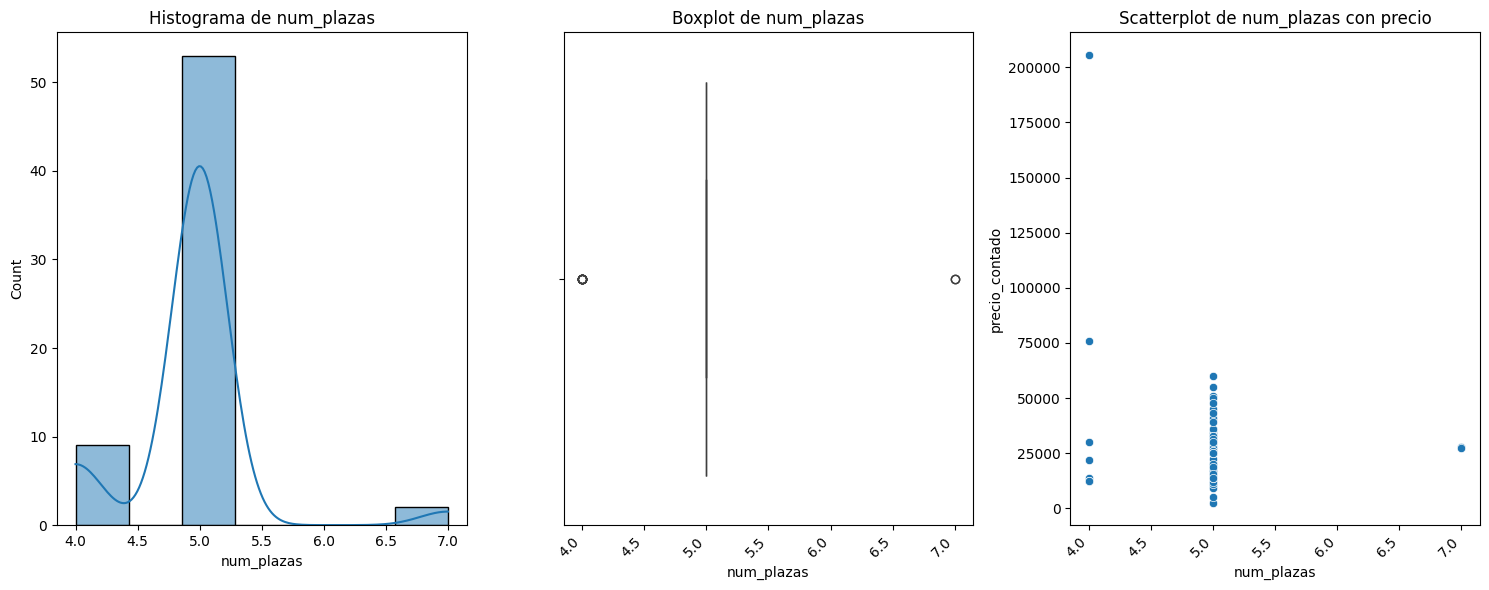

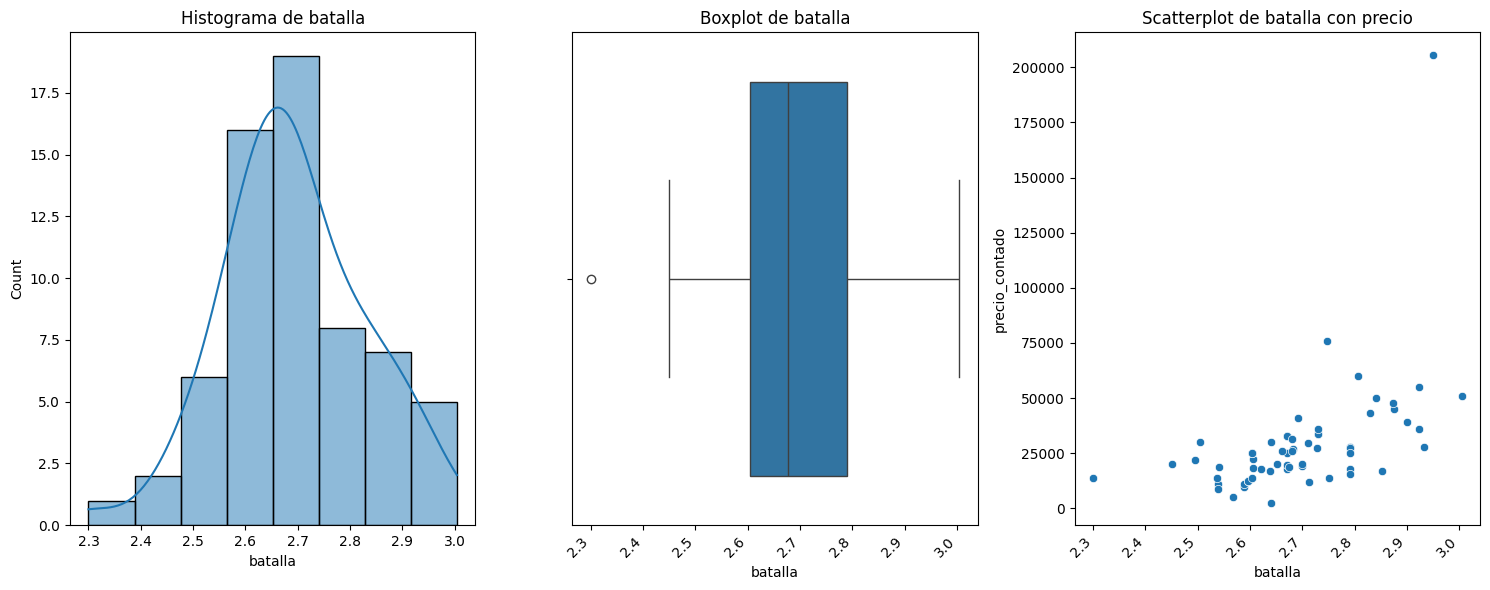

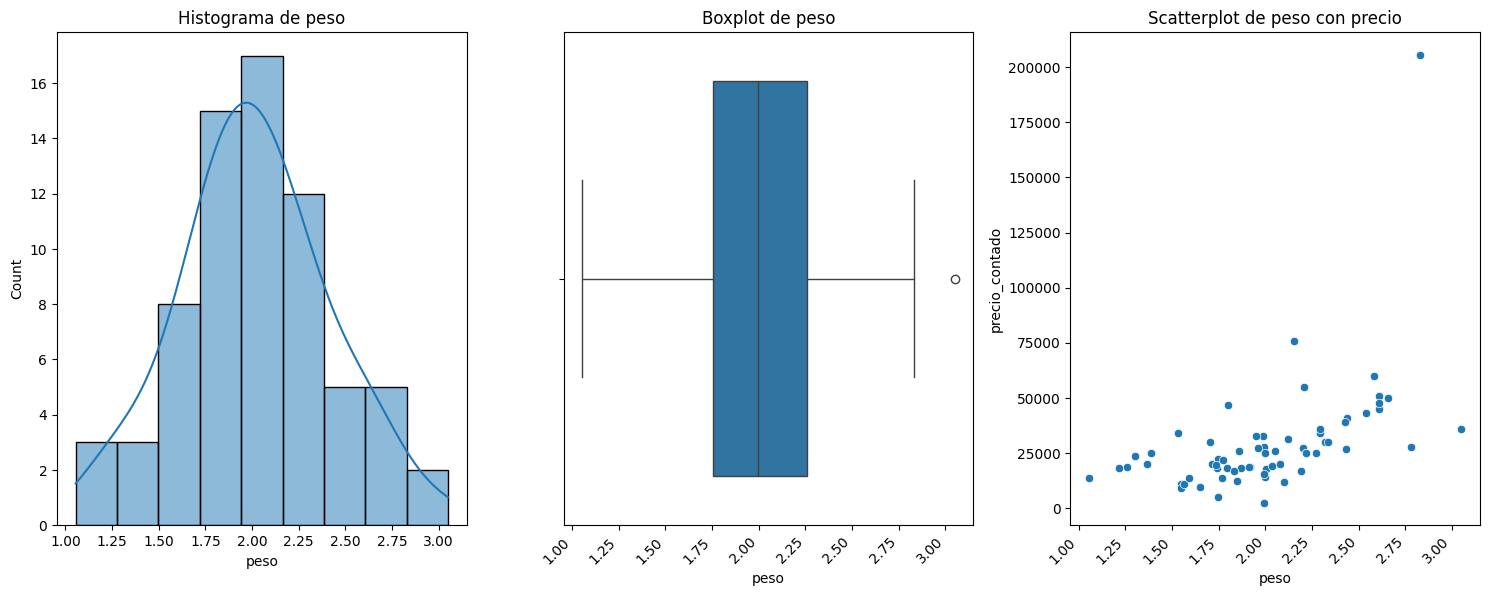

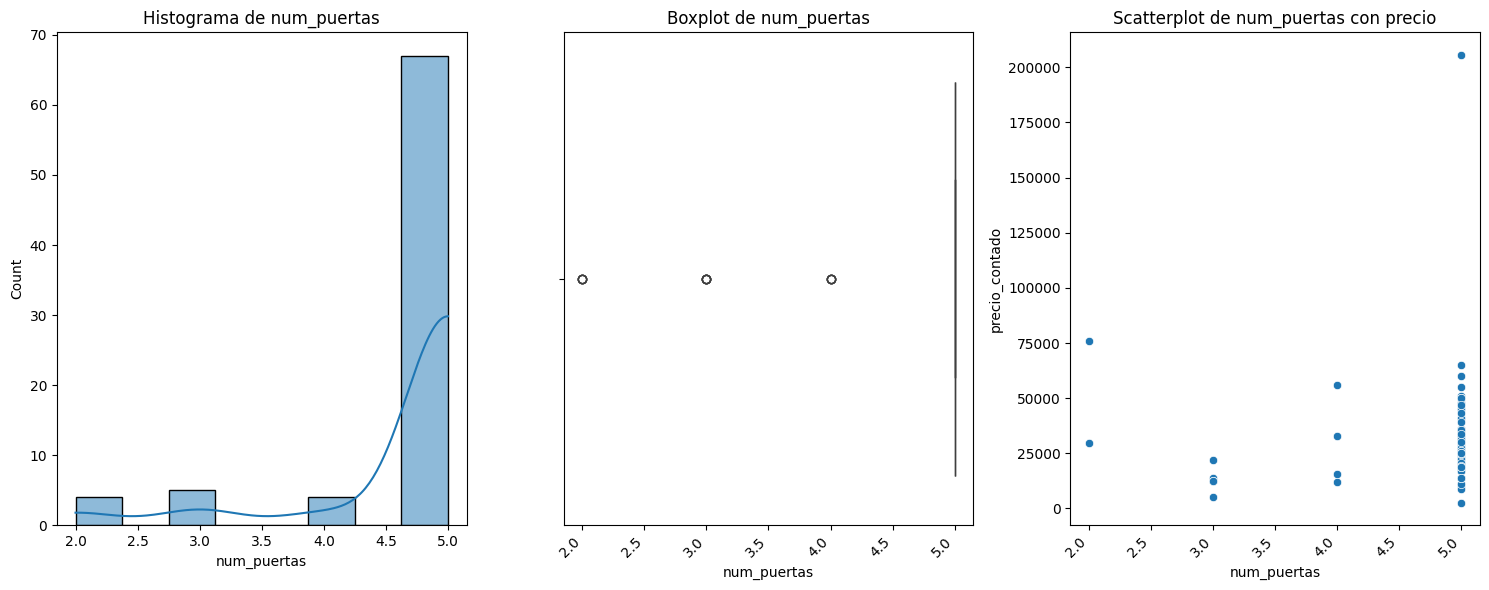

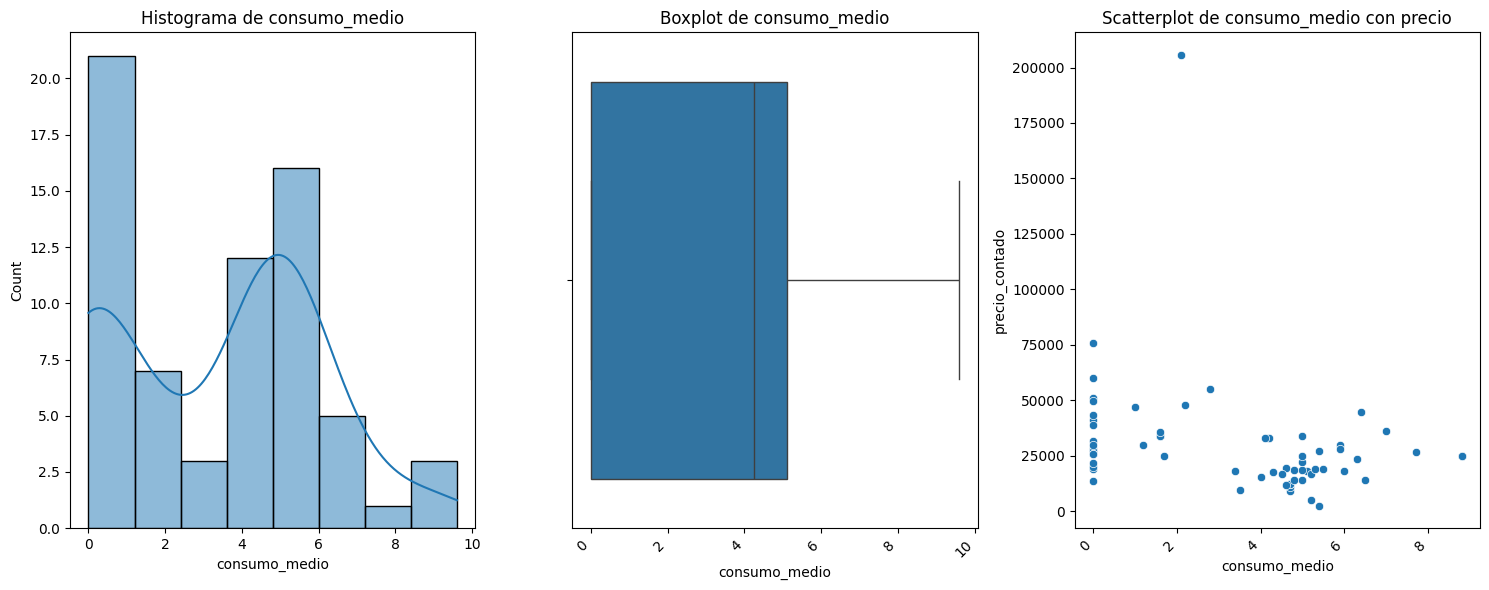

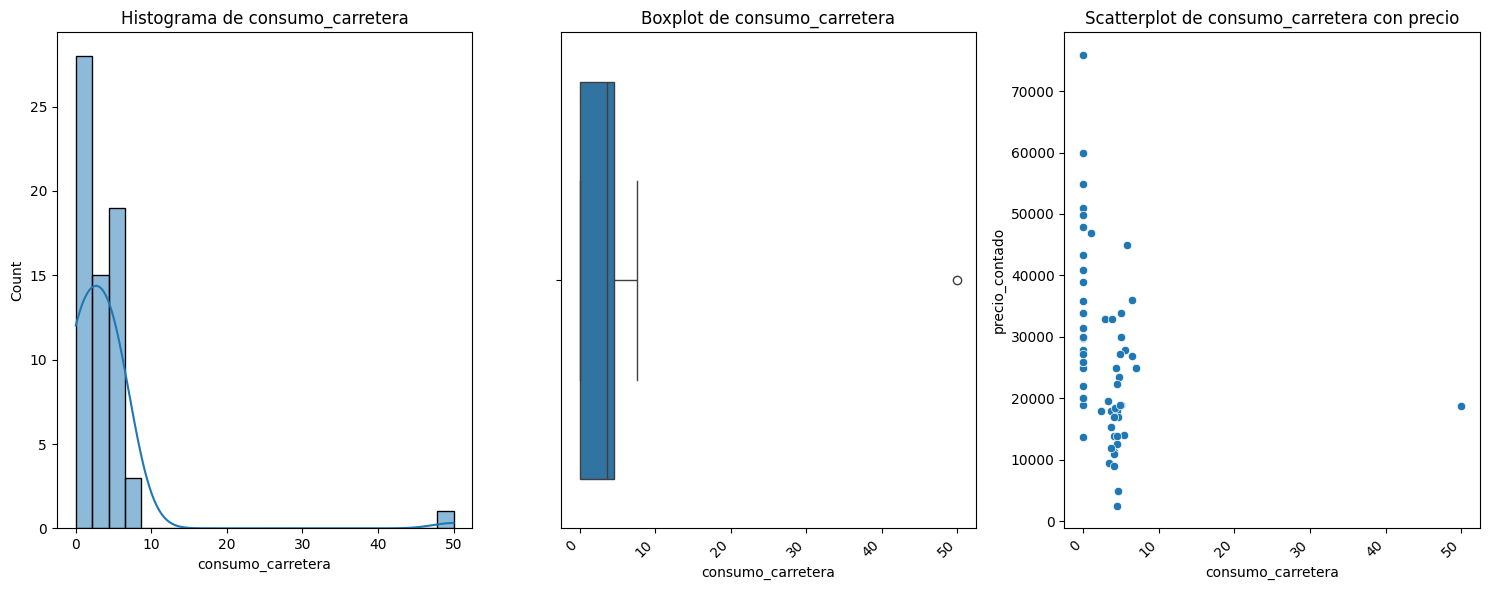

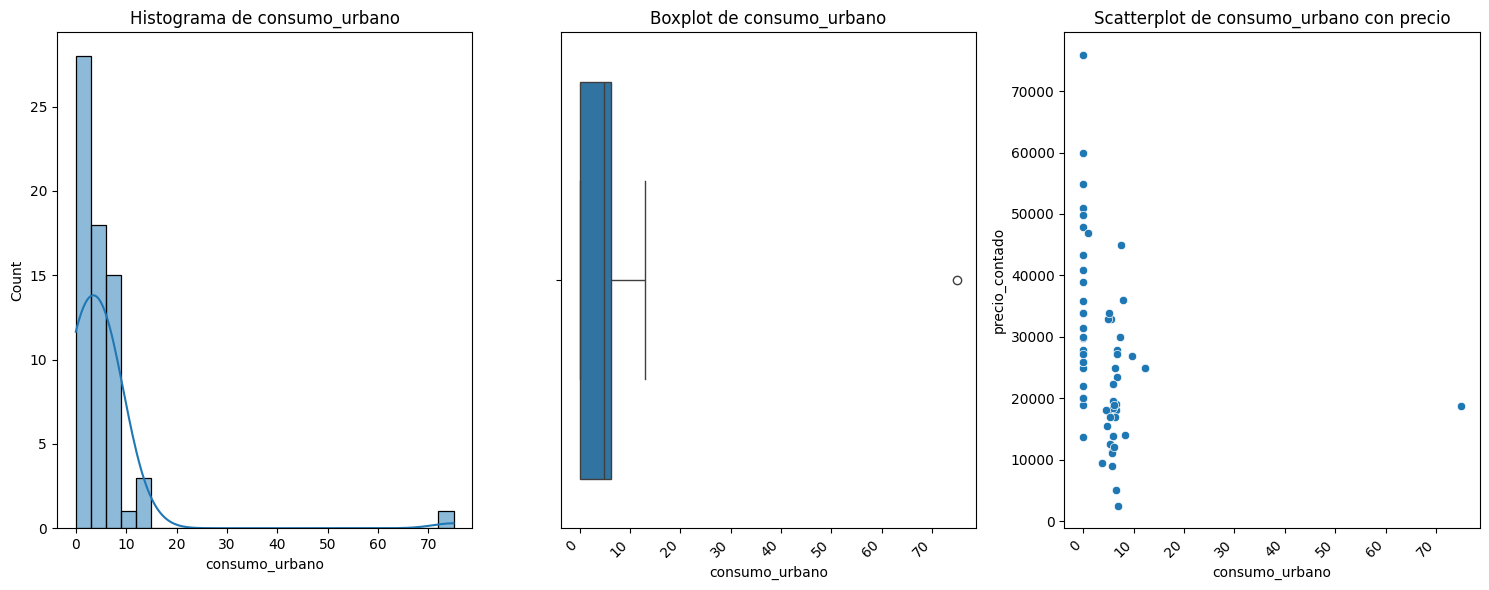

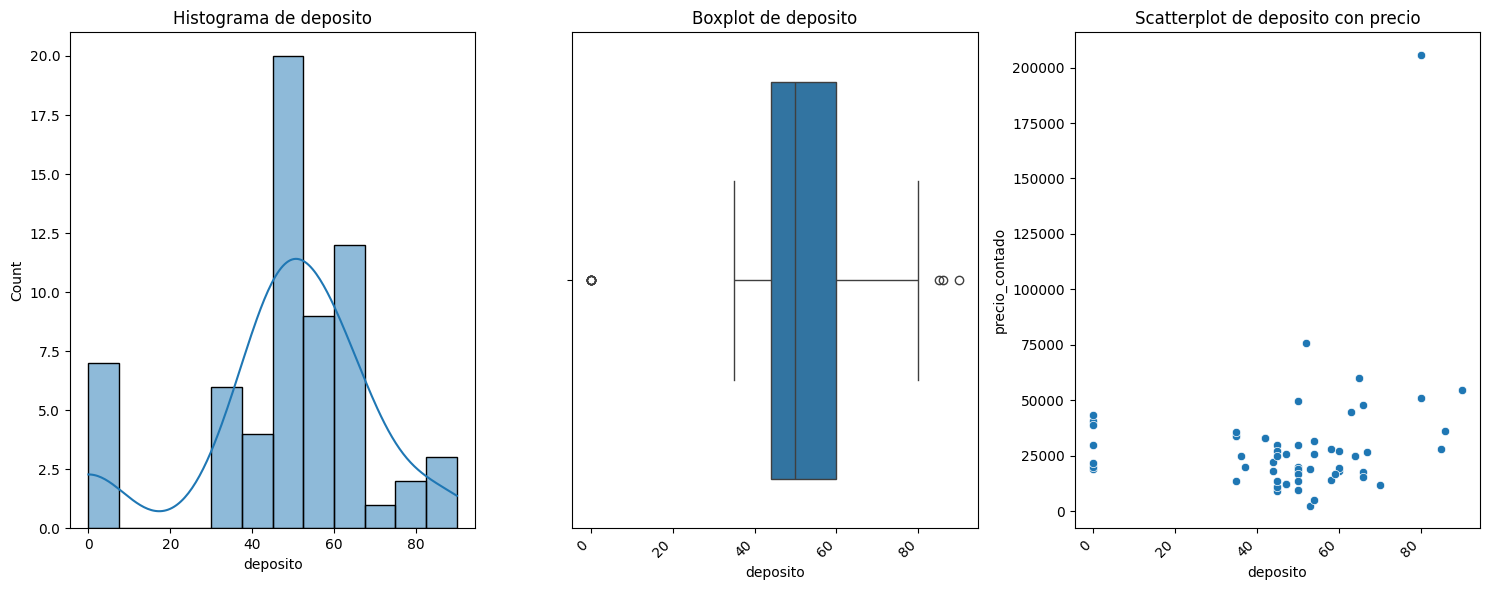

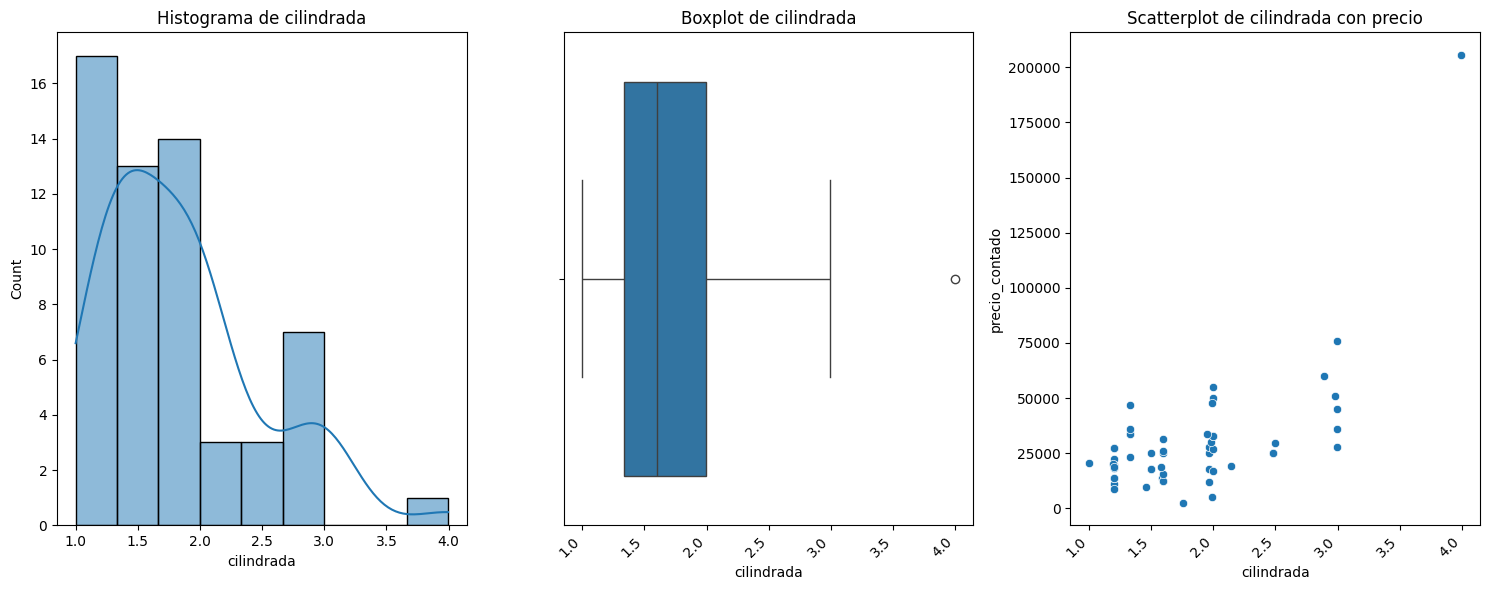

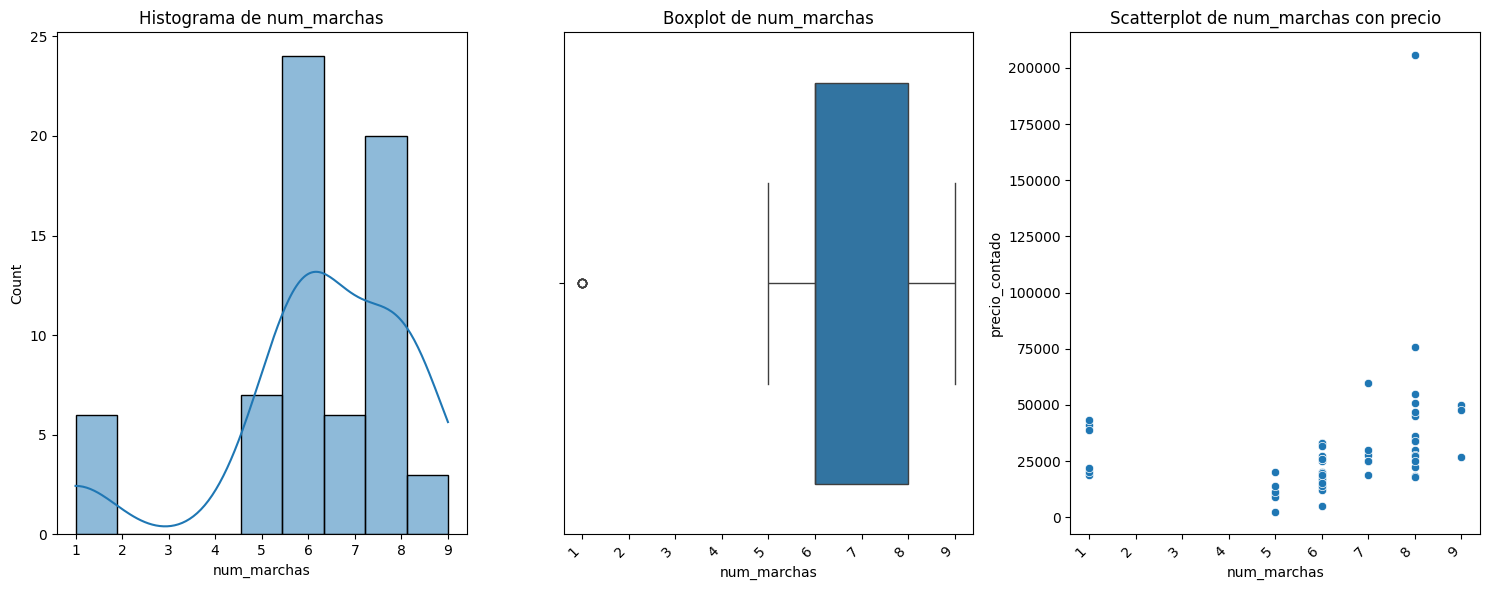

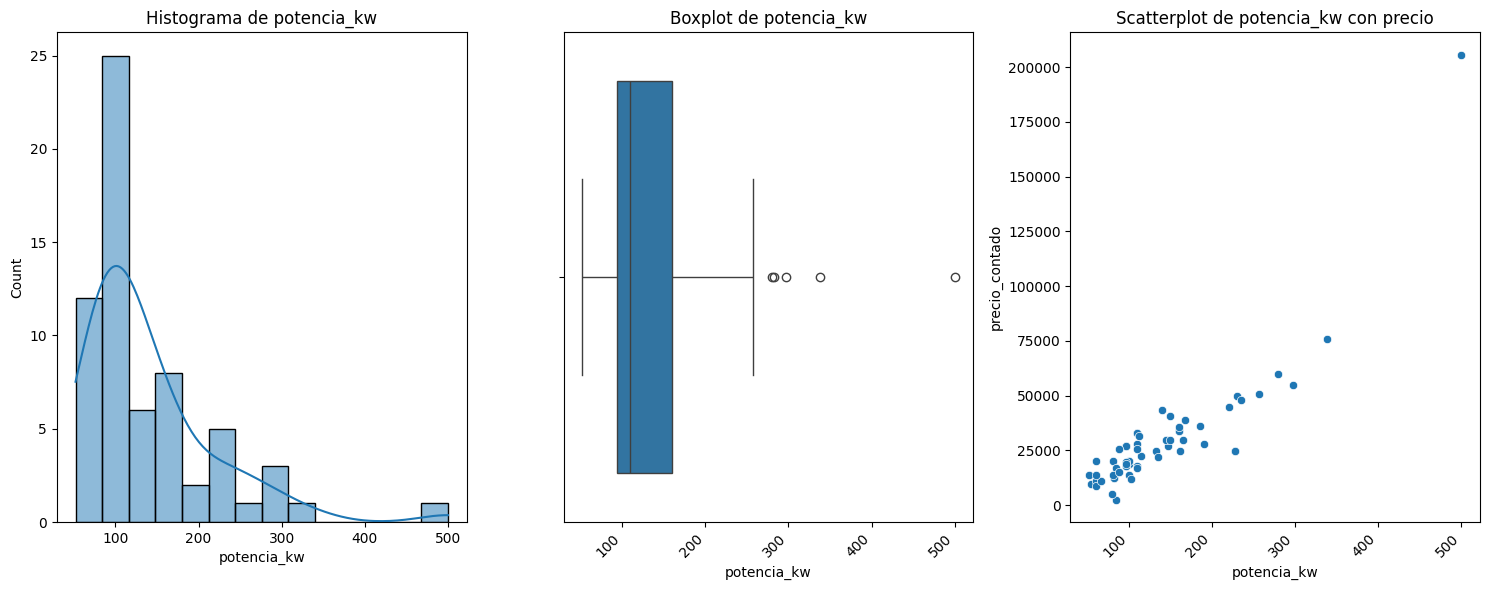

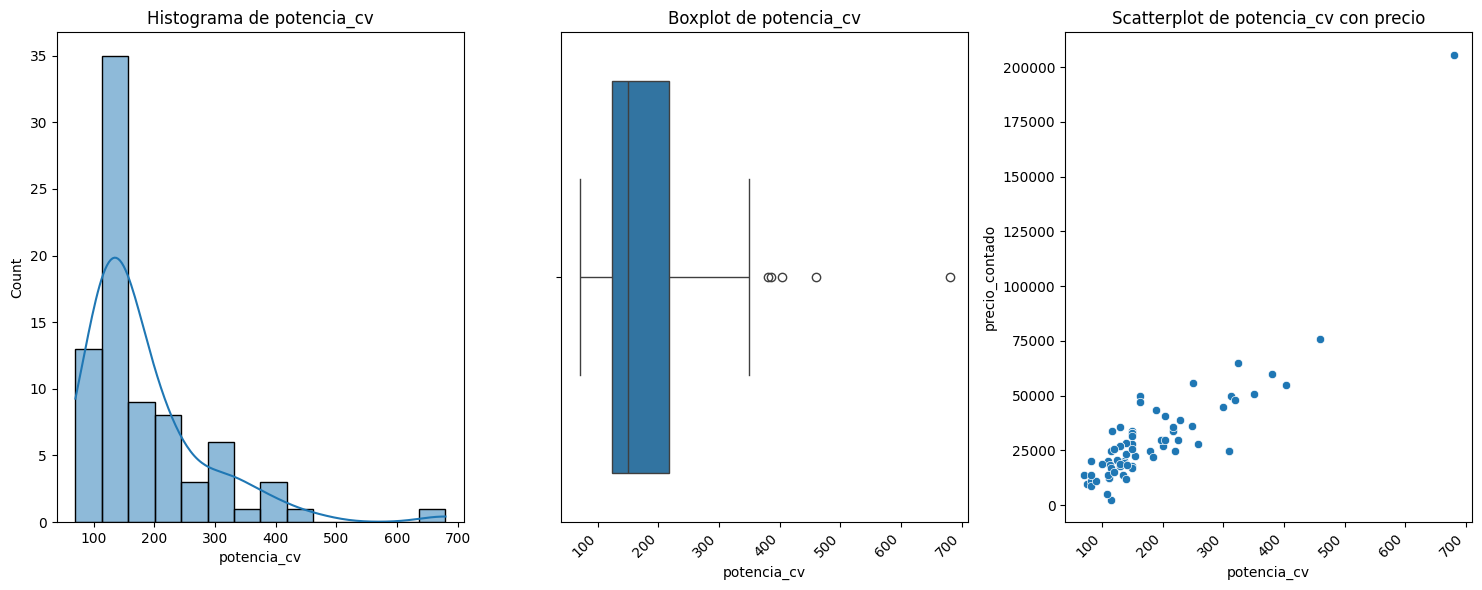

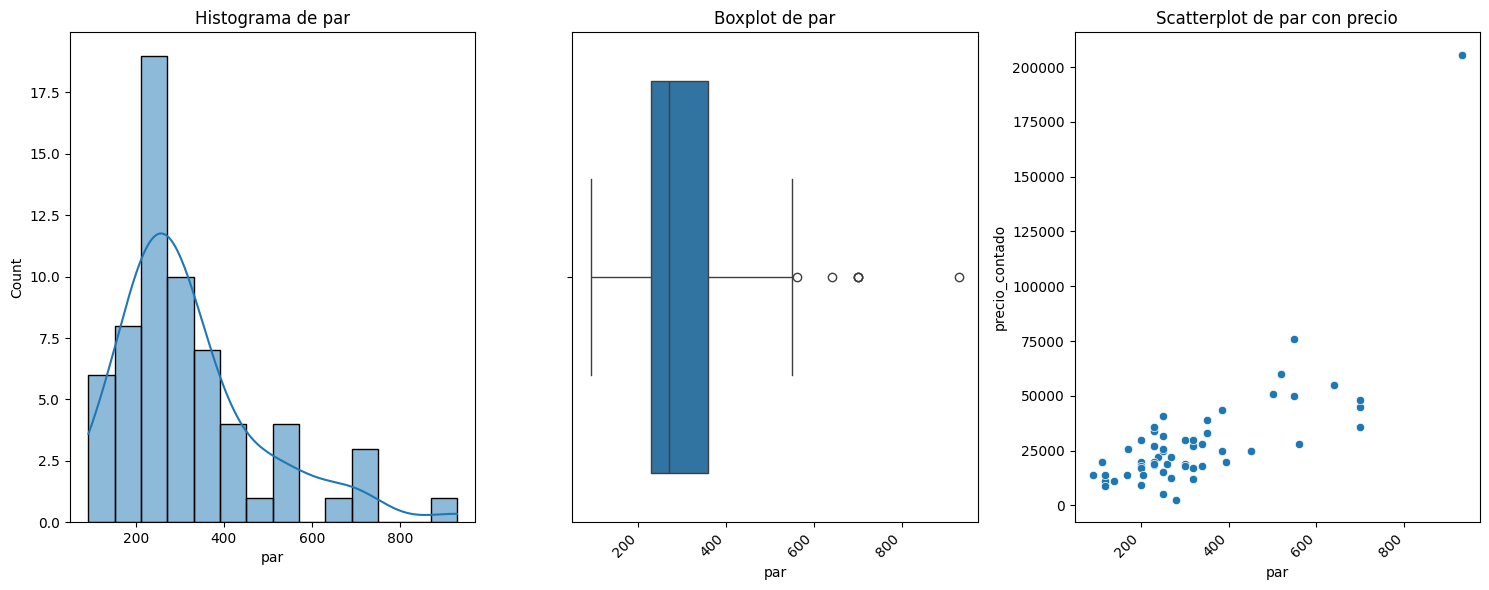

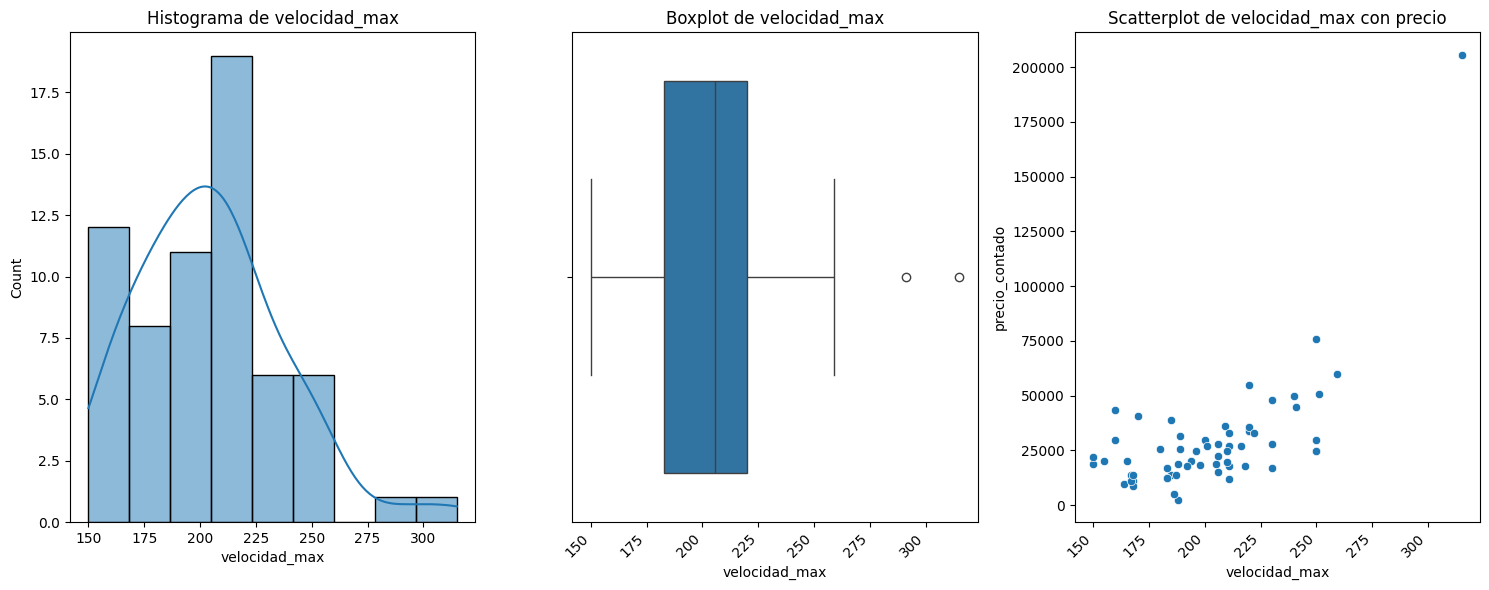

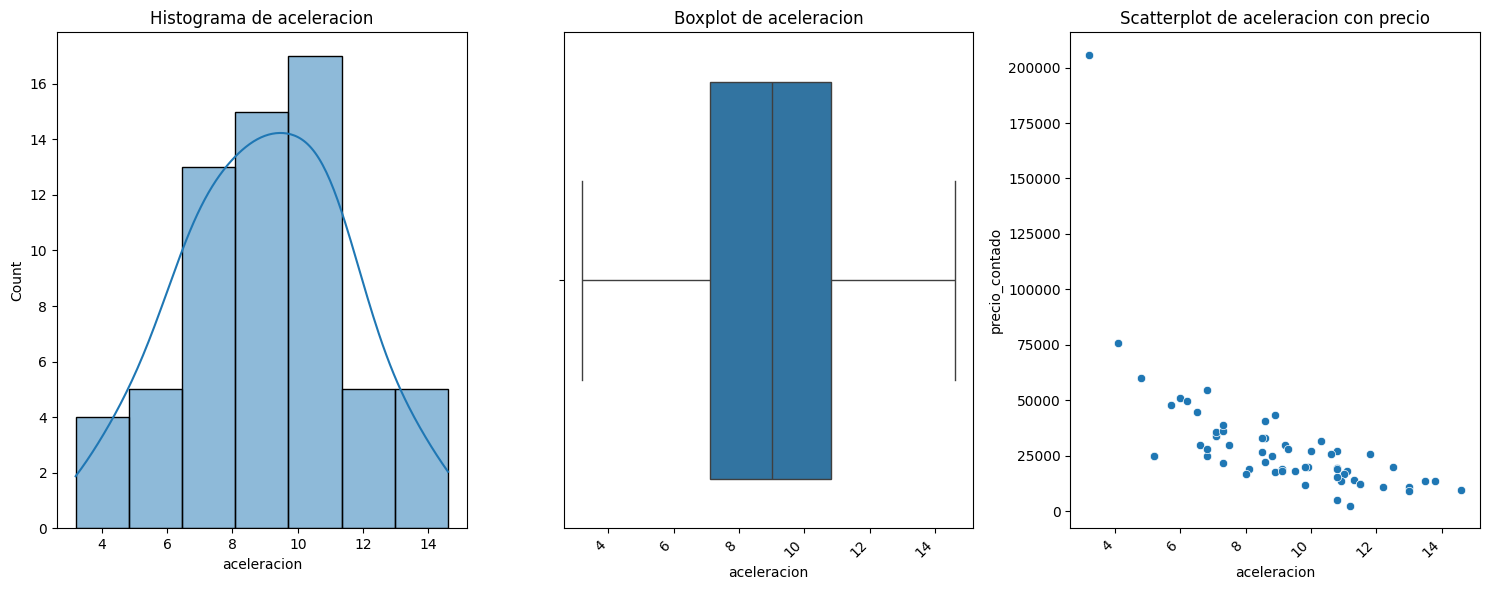

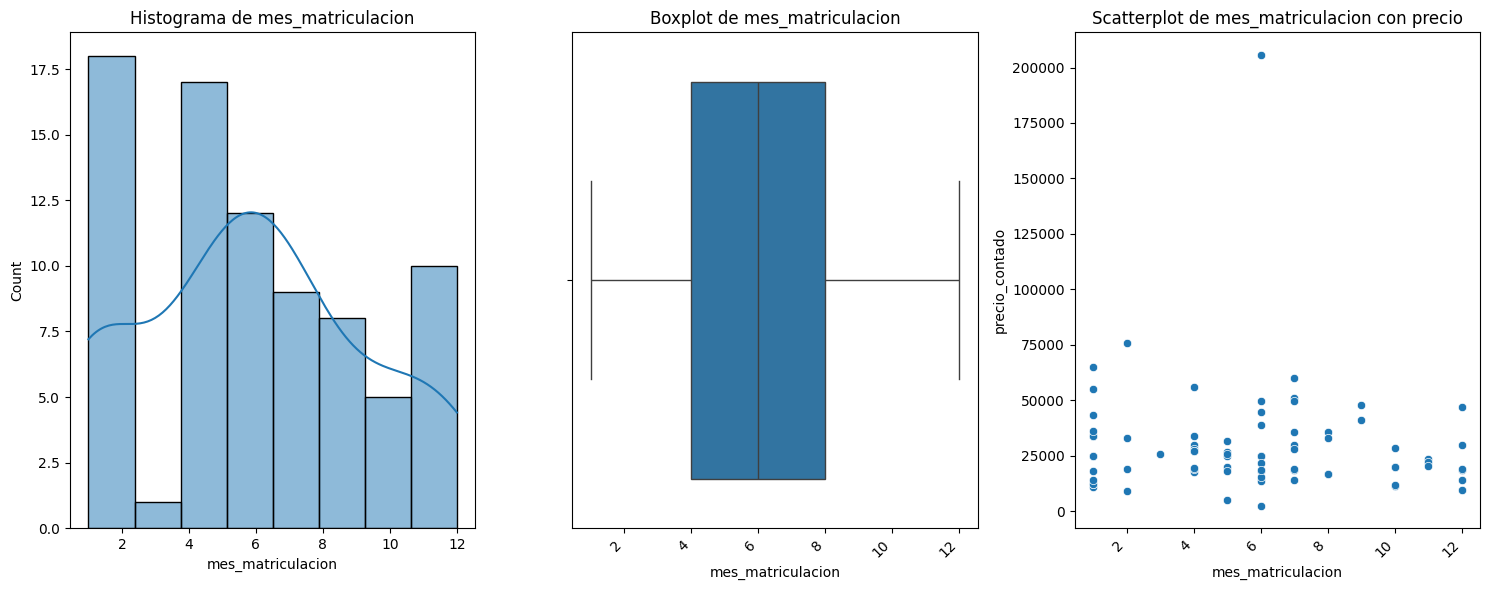

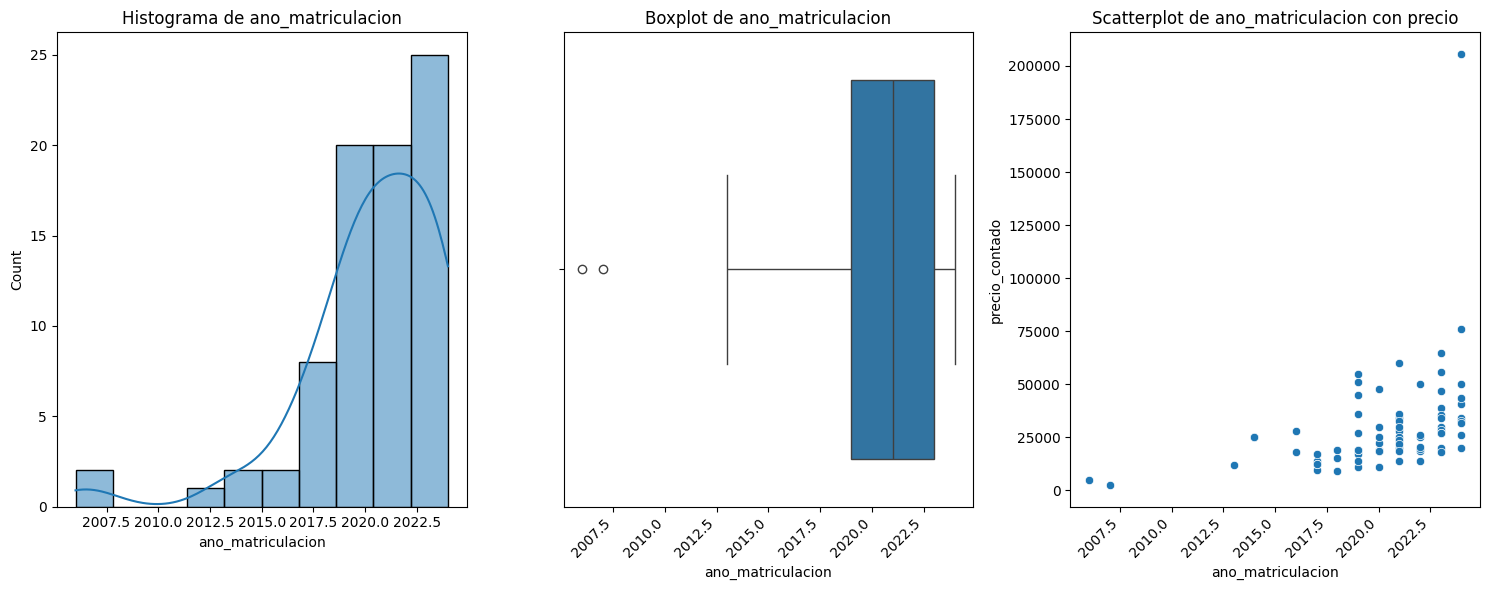

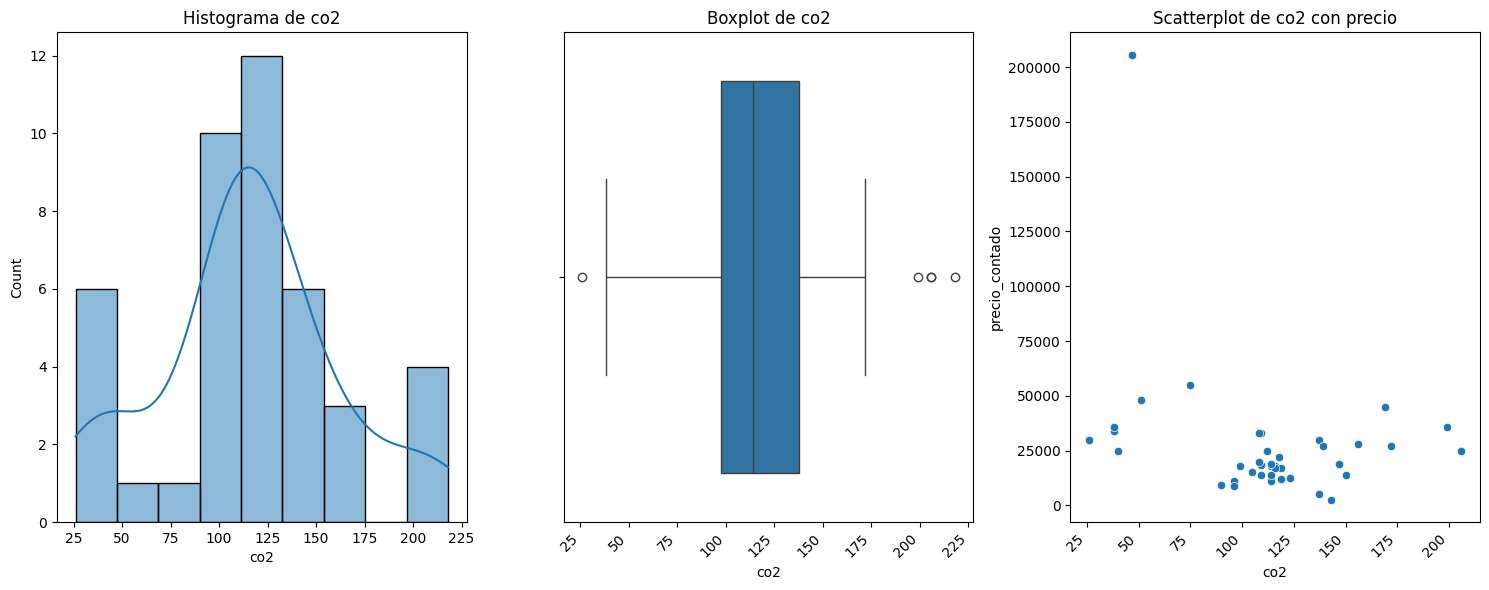

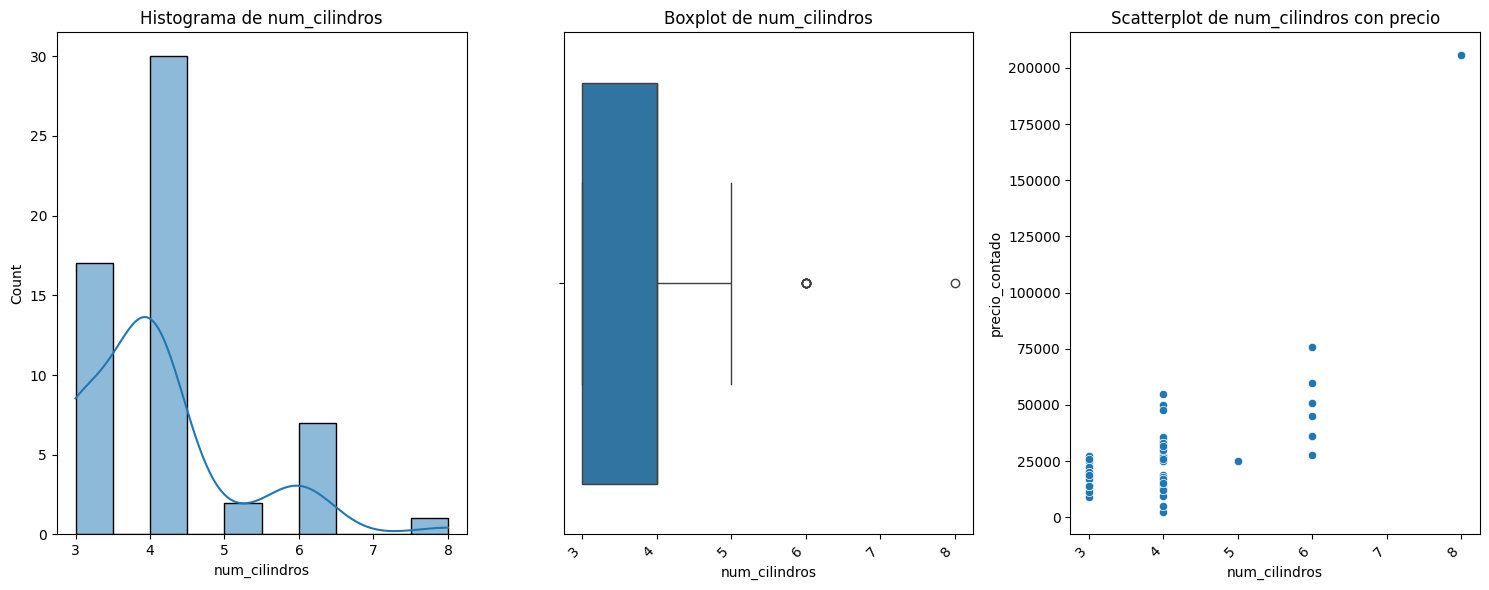

In [54]:
for columna in continuous_columns:
    metricas(df, columna)

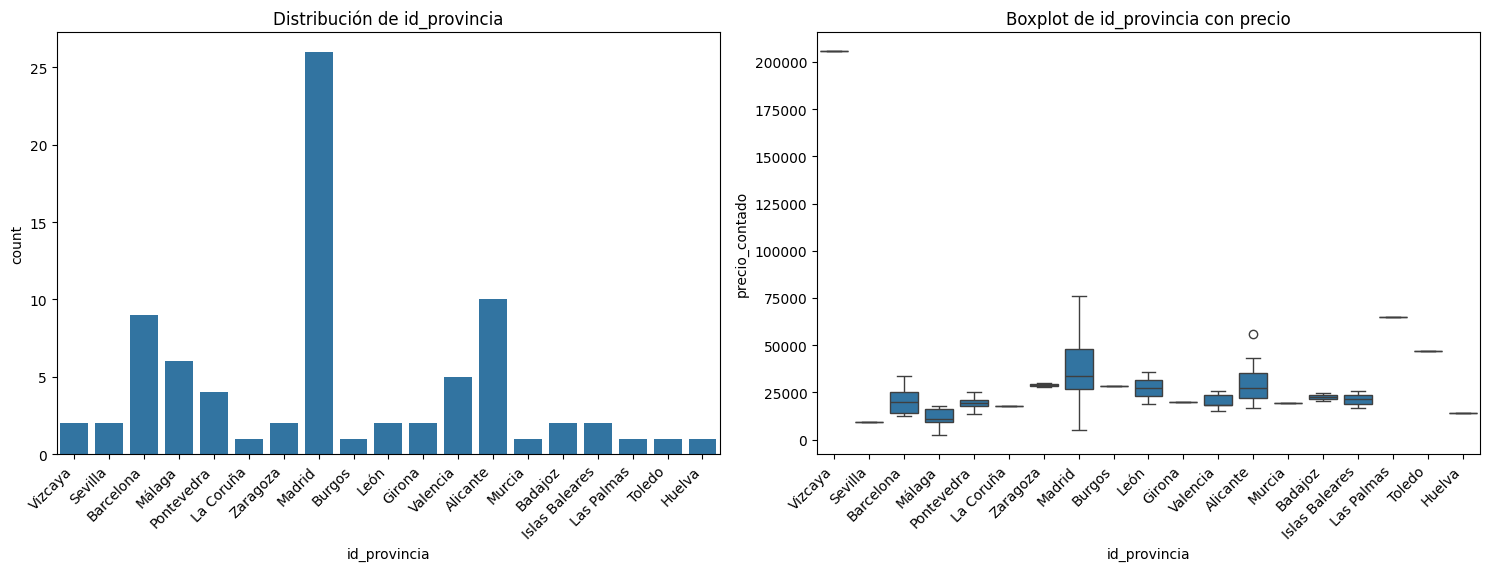

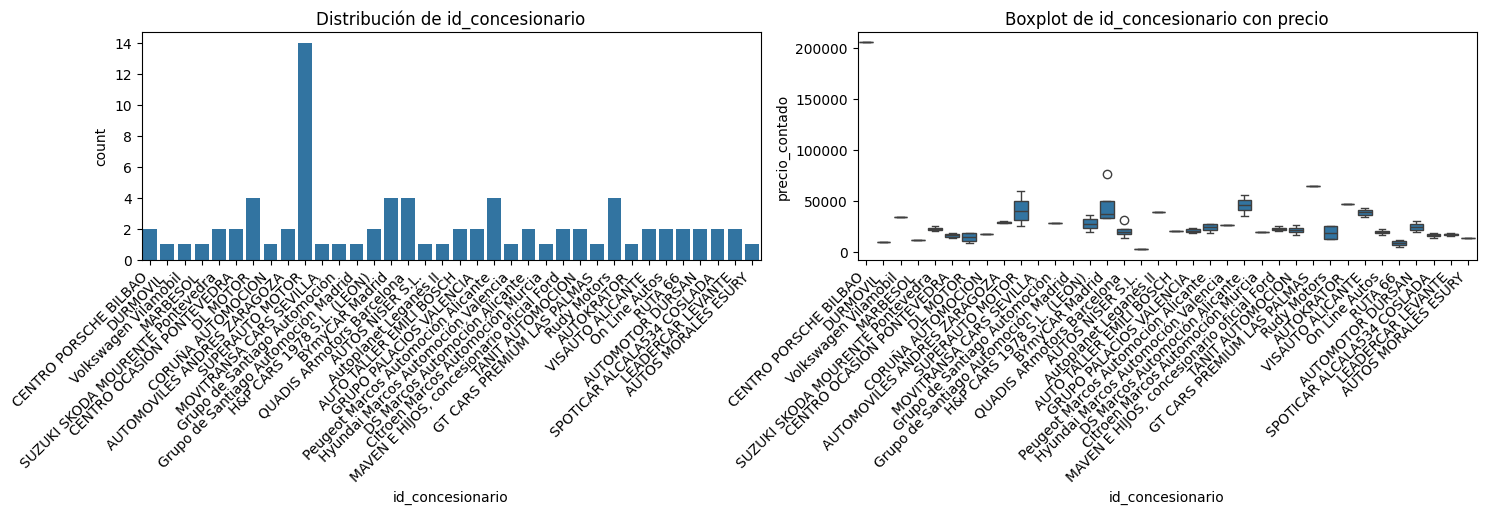

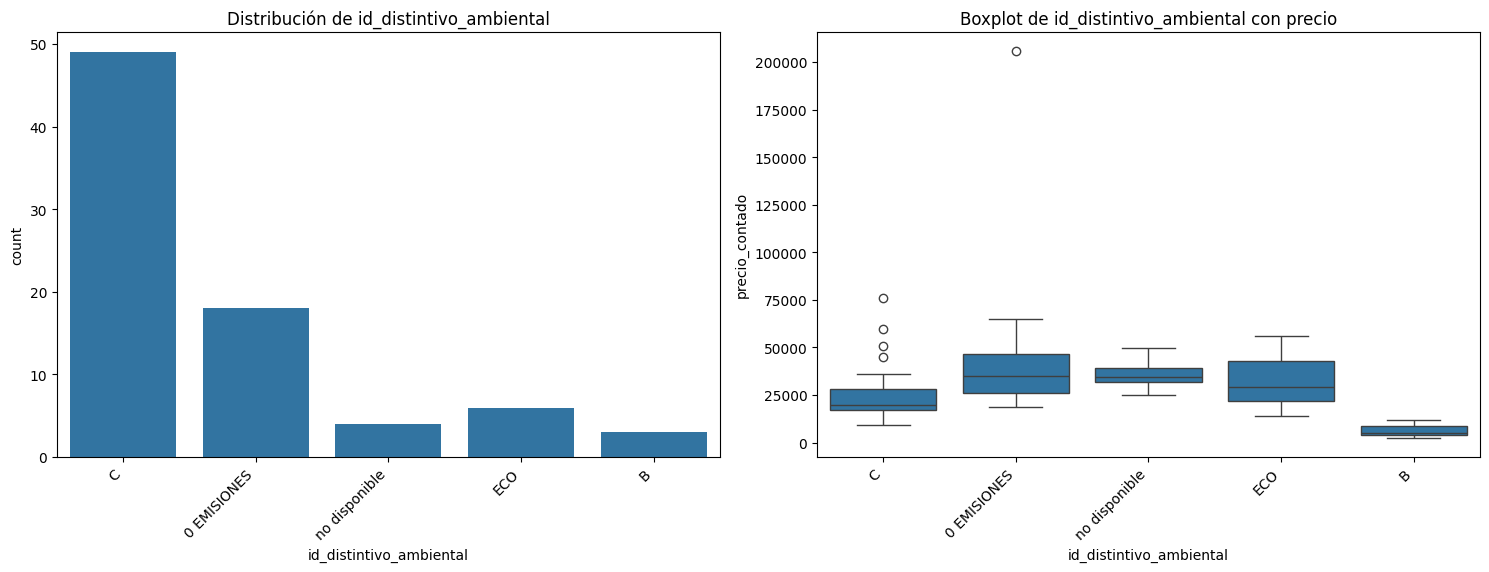

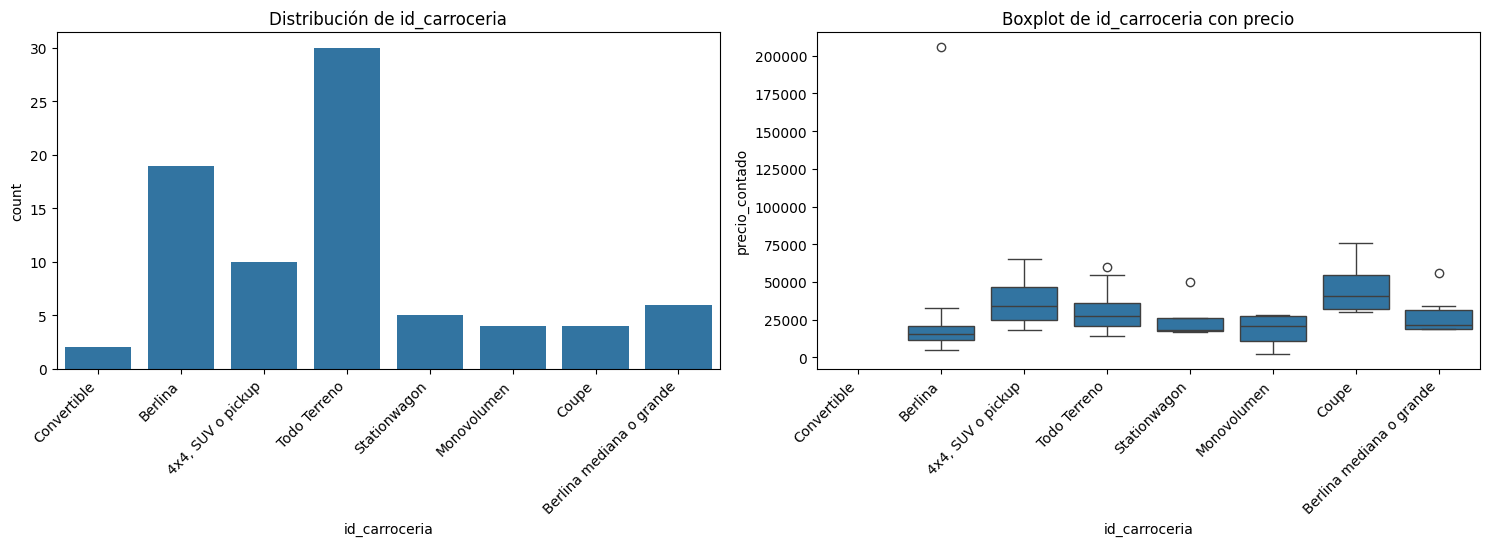

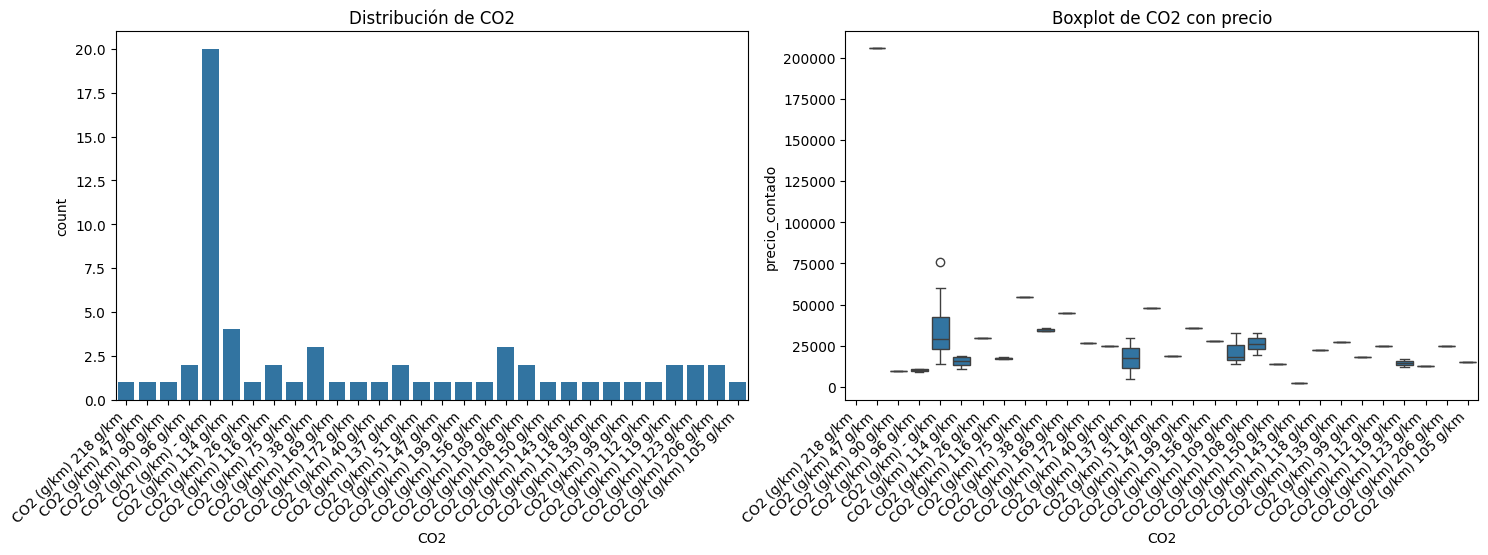

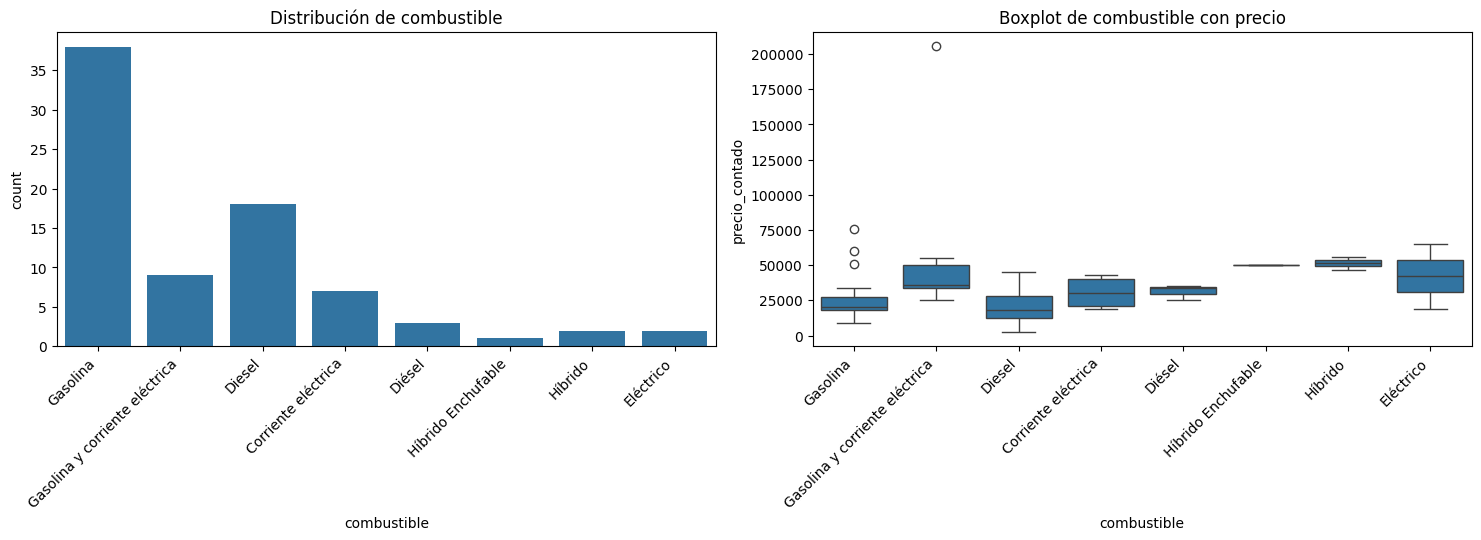

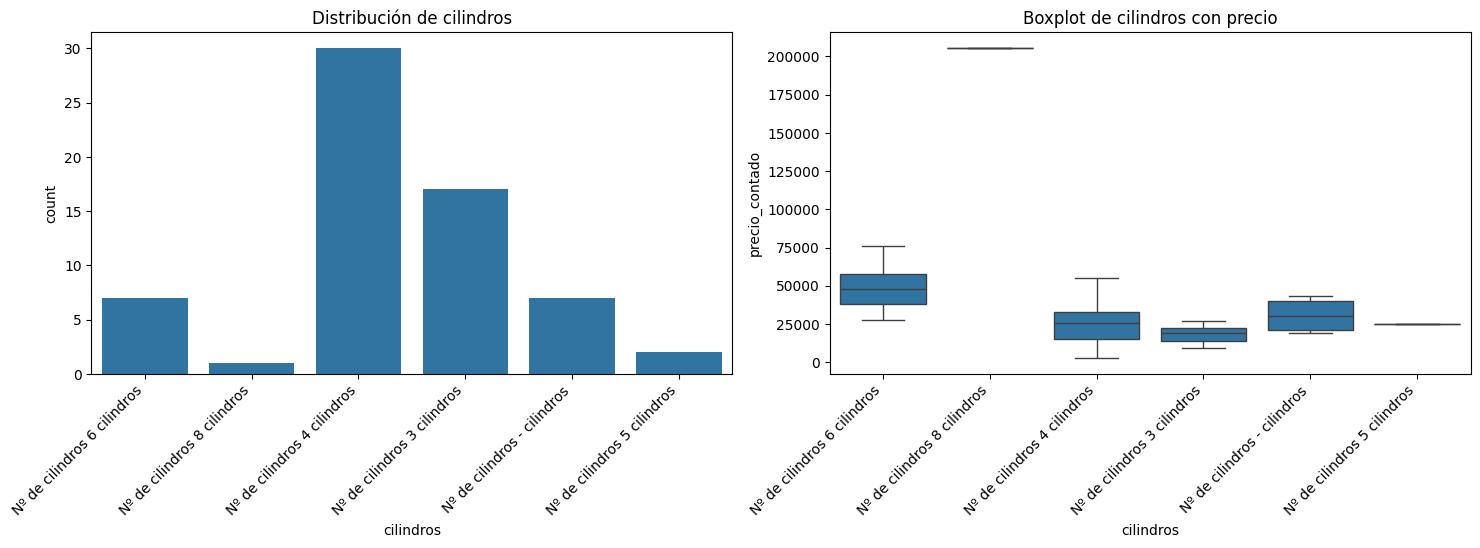

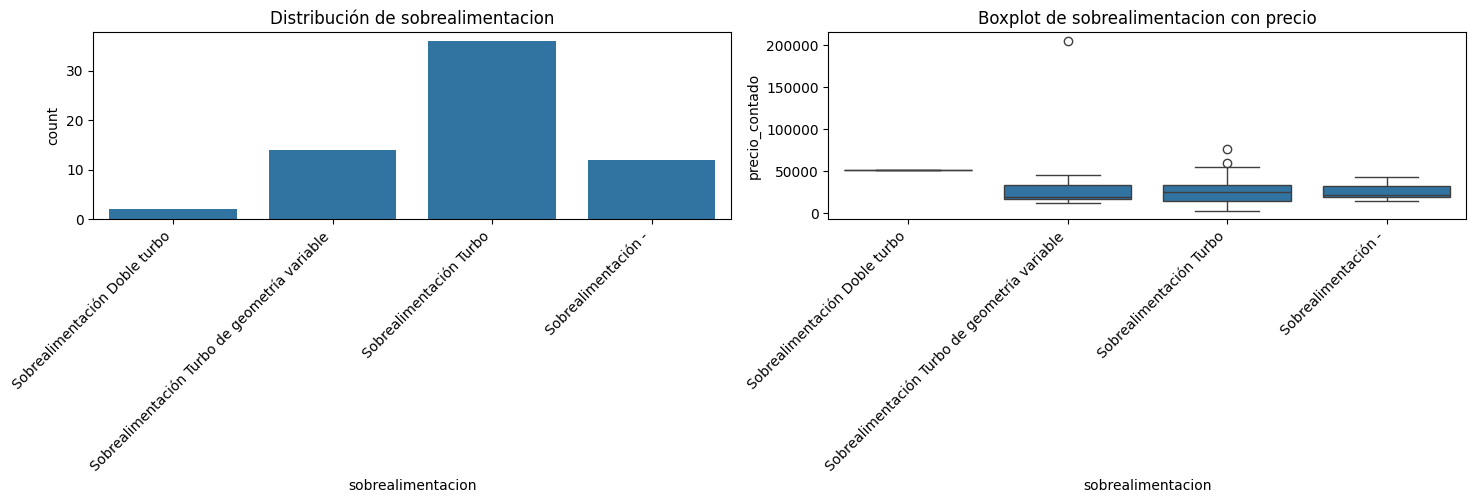

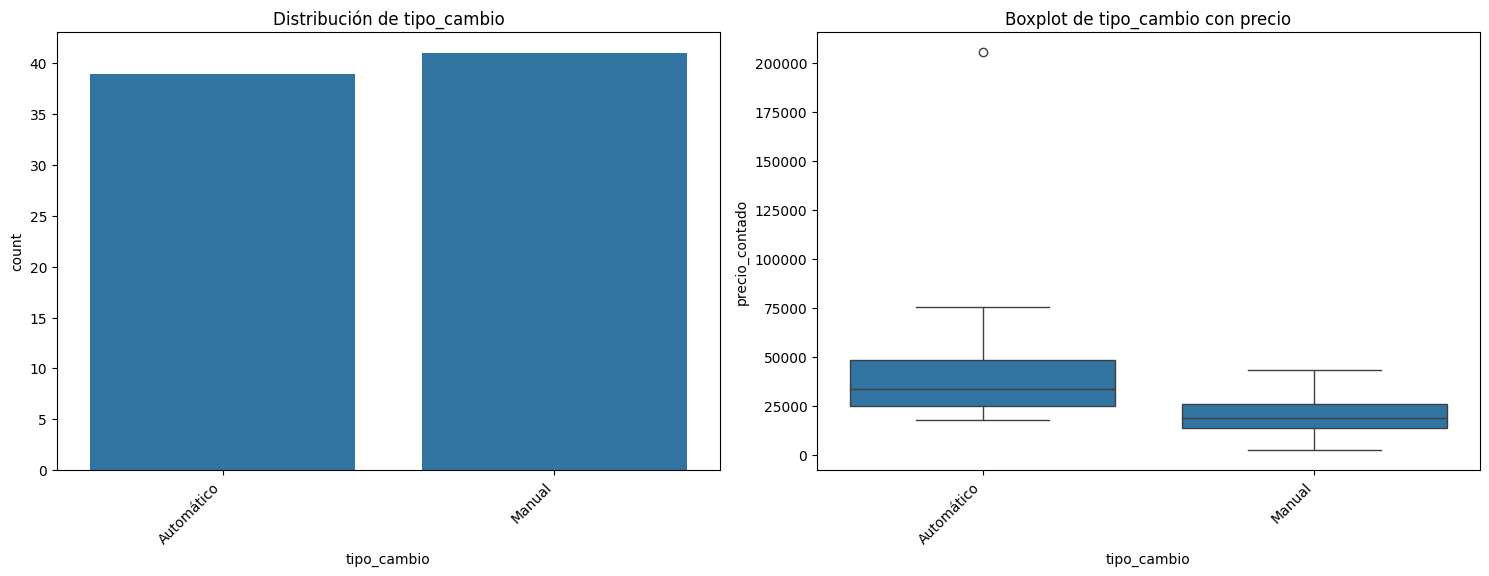

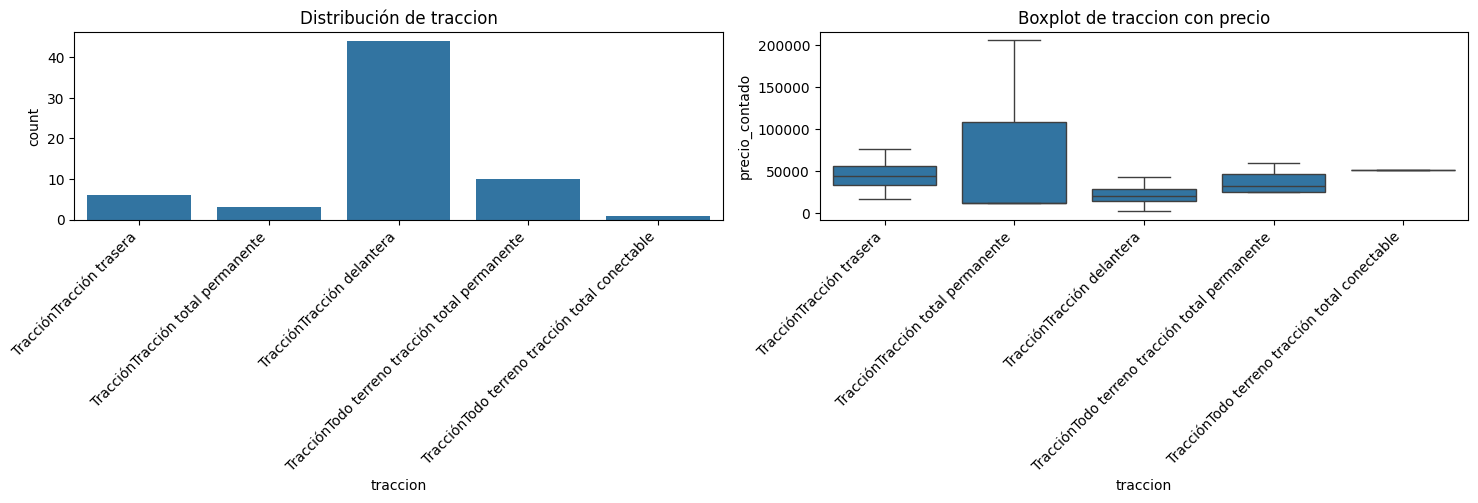

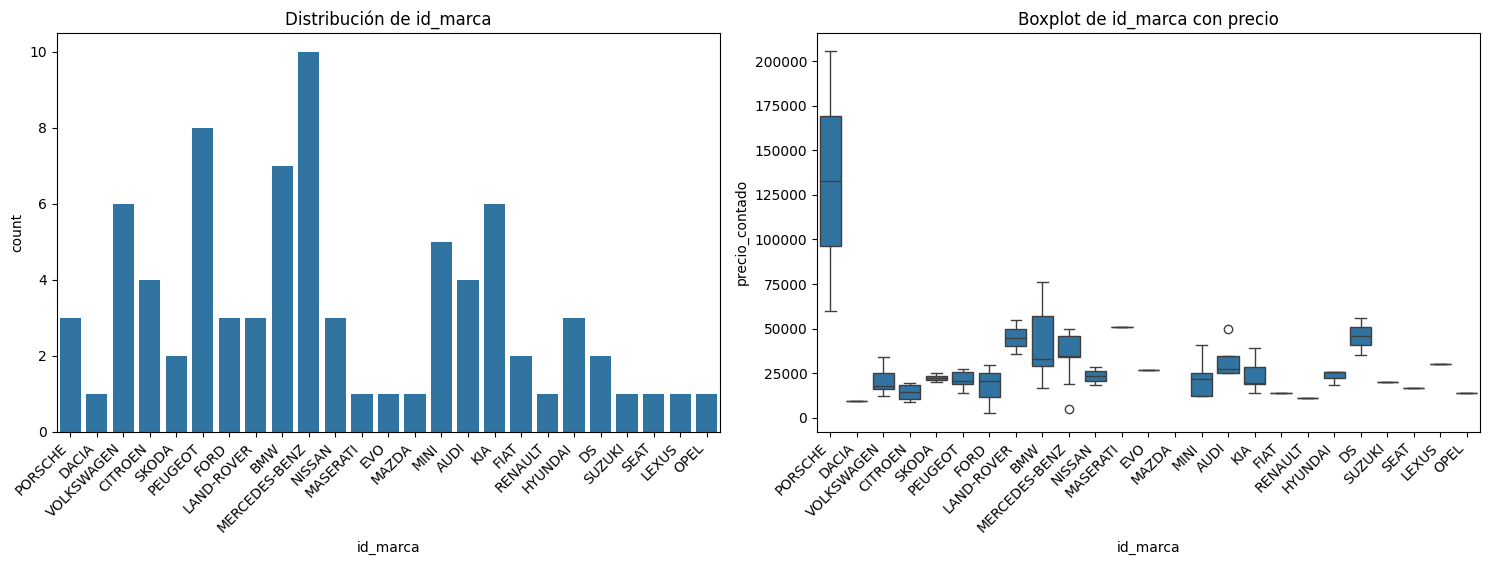

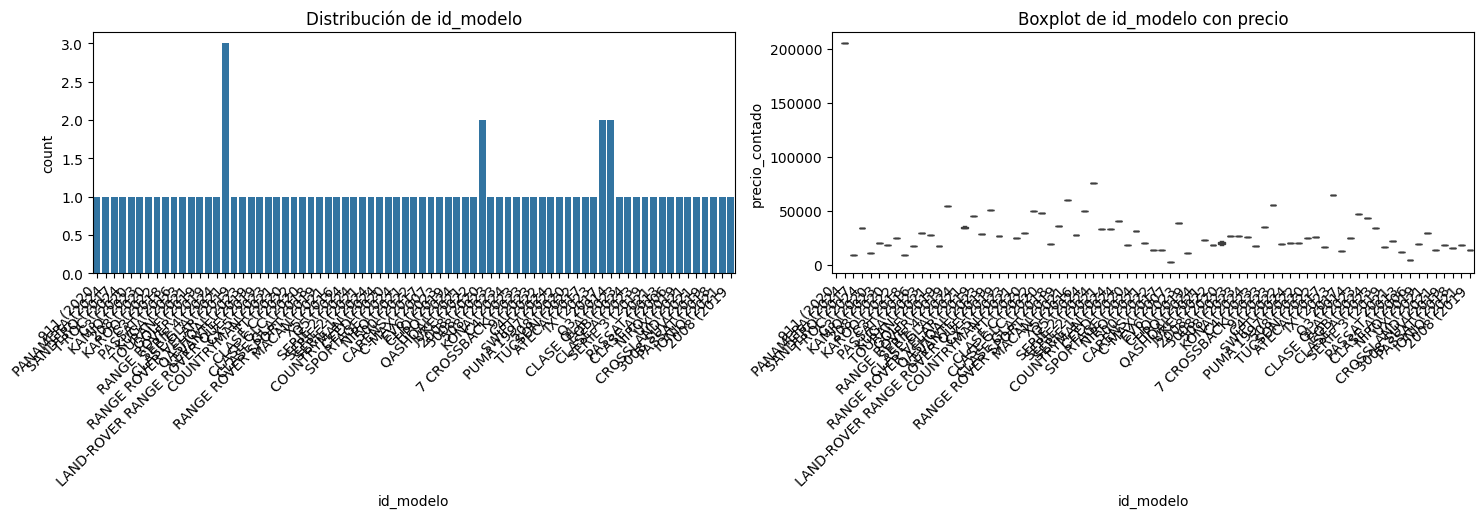

In [55]:
for columna in categorical_columns:
    metricas(df, columna)

In [56]:
continuous_columns

Index(['kilometraje', 'garantia', 'precio_contado', 'precio_nuevo', 'largo',
       'ancho', 'alto', 'capacidad_maletero', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'deposito', 'cilindrada', 'num_marchas', 'potencia_kw', 'potencia_cv',
       'par', 'velocidad_max', 'aceleracion', 'mes_matriculacion',
       'ano_matriculacion', 'co2', 'num_cilindros'],
      dtype='object')

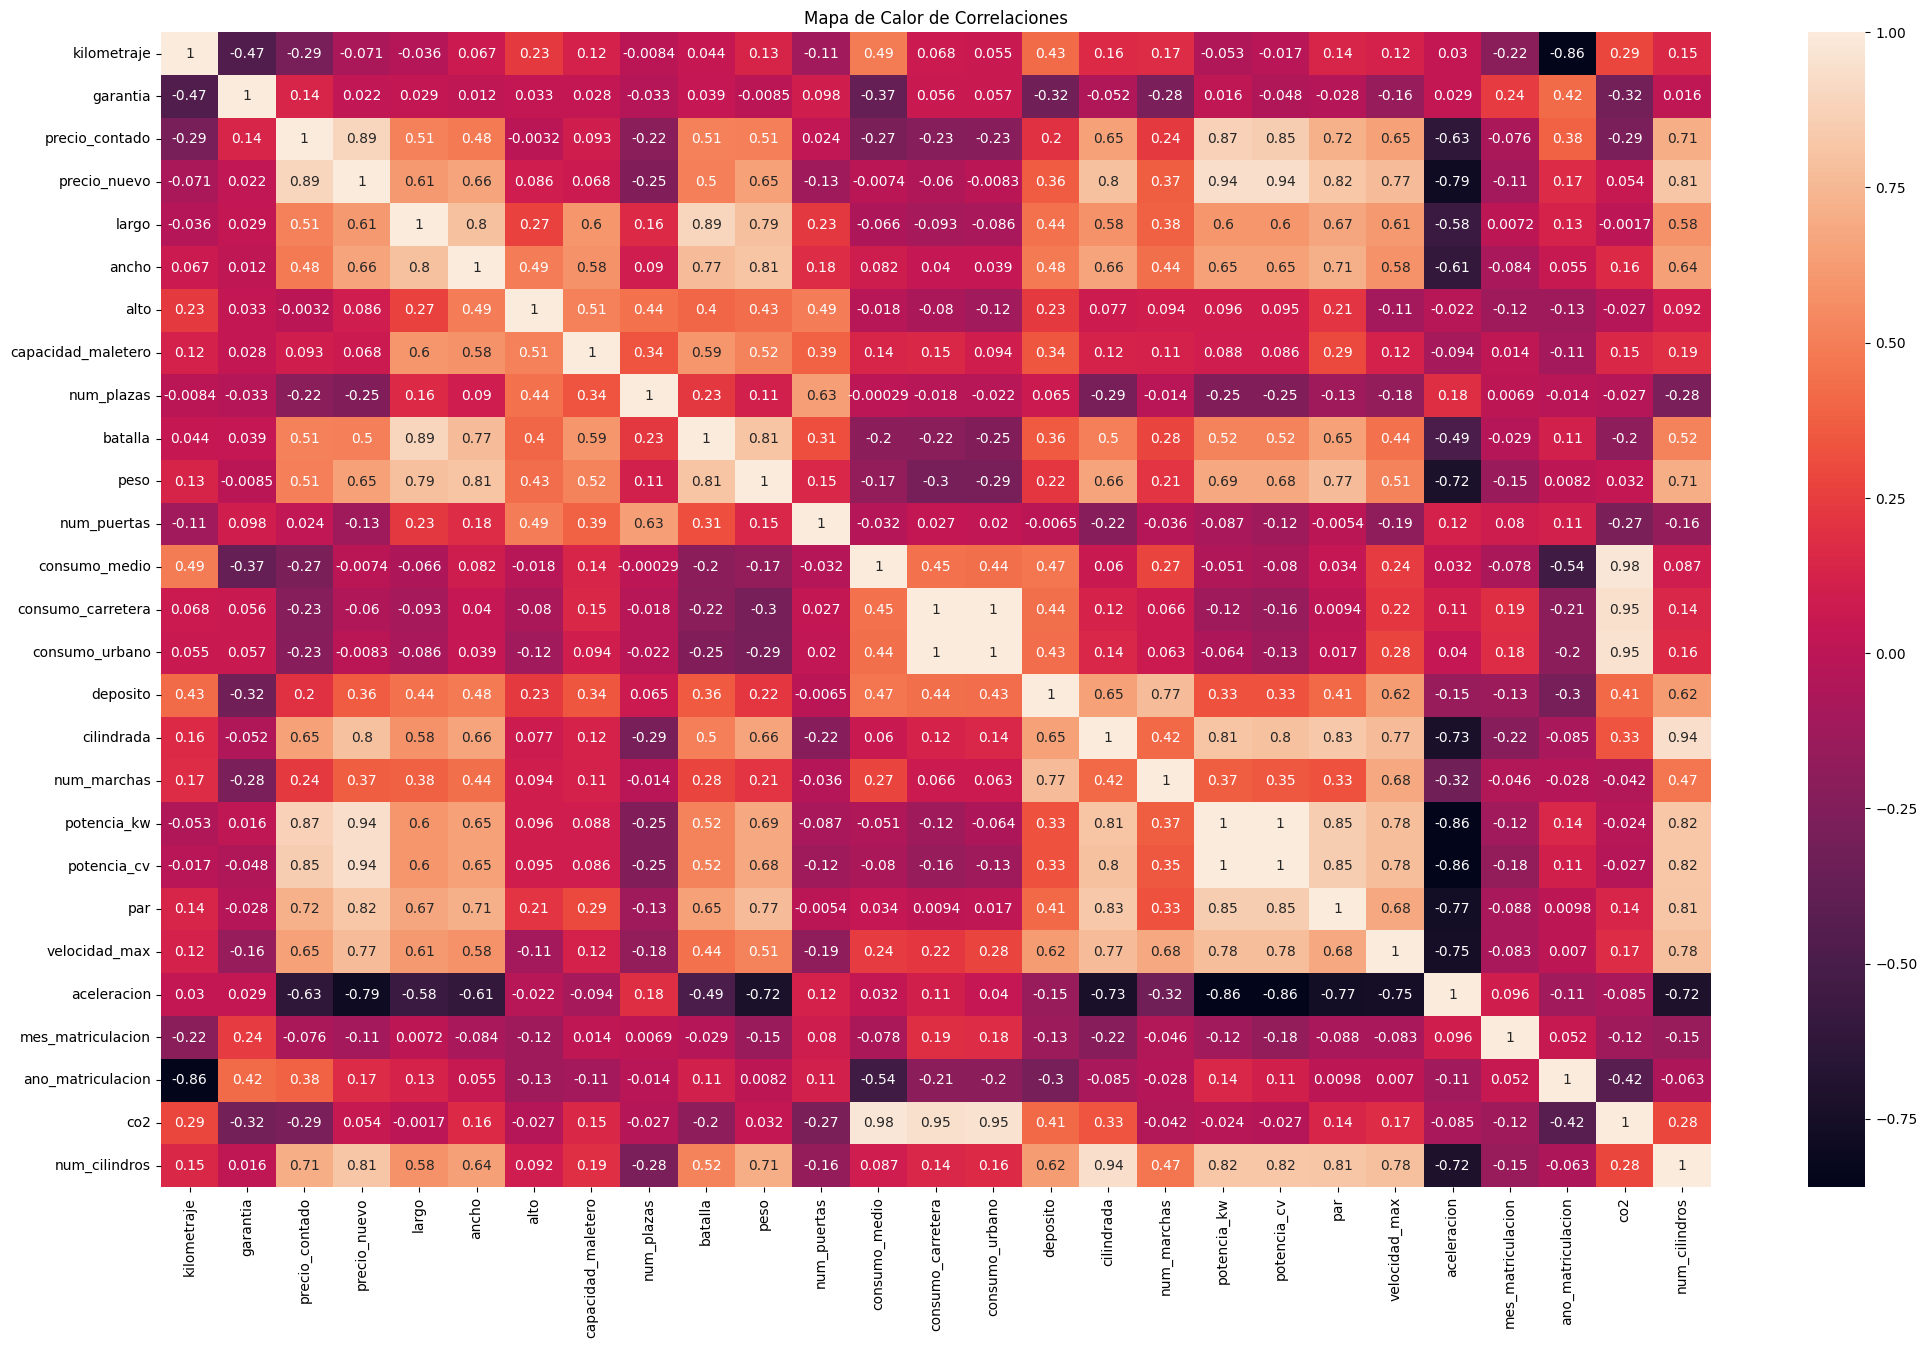

In [57]:
correlation_matrix = df[continuous_columns].corr()

plt.figure(figsize=(25, 15))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [58]:
df.head()

,id_provincia,kilometraje,id_concesionario,id_distintivo_ambiental,garantia,precio_contado,precio_nuevo,largo,ancho,alto,capacidad_maletero,id_carroceria,num_plazas,batalla,peso,num_puertas,consumo_medio,consumo_carretera,consumo_urbano,CO2,deposito,combustible,cilindros,cilindrada,sobrealimentacion,tipo_cambio,traccion,num_marchas,potencia_kw,potencia_cv,par,velocidad_max,aceleracion,mes_matriculacion,ano_matriculacion,co2,num_cilindros,id_marca,id_modelo
0,Vizcaya,21500,CENTRO PORSCHE BILBAO,C,12.0,NaN,158158.0,4519.0,1852.0,1297.0,132.0,Convertible,4.0,2.450,2.015,2,9.6,7.6,12.9,CO2 (g/km) 218 g/km,64.0,Gasolina,Nº de cilindros 6 cilindros,2.981,Sobrealimentación Doble turbo,Automático,TracciónTracción trasera,8.0,283.0,385.0,450.0,291.0,4.4,5,2020,218.0,6.0,PORSCHE,911 (2020
1,Vizcaya,10000,CENTRO PORSCHE BILBAO,0 EMISIONES,24.0,205700.0,204516.0,5054.0,1937.0,1421.0,421.0,Berlina,4.0,2.950,2.830,5,2.1,NaN,NaN,CO2 (g/km) 47 g/km,80.0,Gasolina y corriente eléctrica,Nº de cilindros 8 cilindros,3.996,Sobrealimentación Turbo de geometría variable,Automático,TracciónTracción total permanente,8.0,500.0,680.0,930.0,315.0,3.2,6,2024,47.0,8.0,PORSCHE,PANAMERA (2024
2,Sevilla,124000,DURMOVIL,C,12.0,9499.0,9696.0,4069.0,1733.0,1519.0,320.0,Berlina,5.0,2.589,1.652,5,3.5,3.4,3.7,CO2 (g/km) 90 g/km,50.0,Diesel,Nº de cilindros 4 cilindros,1.461,Sobrealimentación Turbo,Manual,TracciónTracción delantera,5.0,55.0,75.0,200.0,164.0,14.6,12,2017,90.0,4.0,DACIA,SANDERO (2017
3,Barcelona,10,Volkswagen Vilamòbil,C,24.0,33900.0,NaN,NaN,NaN,NaN,NaN,"4x4, SUV o pickup",NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,Gasolina,NaN,NaN,NaN,Automático,NaN,NaN,NaN,150.0,NaN,NaN,NaN,1,2024,NaN,NaN,VOLKSWAGEN,T-ROC (2024
4,Málaga,60000,MARBESOL,C,12.0,11190.0,15700.0,3996.0,1749.0,1474.0,300.0,Berlina,5.0,2.539,1.550,5,4.7,4.1,5.7,CO2 (g/km) 96 g/km,45.0,Gasolina,Nº de cilindros 3 cilindros,1.199,Sobrealimentación Turbo,Manual,TracciónTracción delantera,5.0,60.0,82.0,118.0,168.0,13.0,10,2020,96.0,3.0,CITROEN,C3 (2020


In [59]:
listado_provincias = {}
for index,detalle in enumerate (df['id_provincia'].unique(), start = 1):
    detalle = detalle
    
    listado_provincias[index] = detalle

In [60]:
listado_provincias

{1: 'Vizcaya',
 2: 'Sevilla',
 3: 'Barcelona',
 4: 'Málaga',
 5: 'Pontevedra',
 6: 'La Coruña',
 7: 'Zaragoza',
 8: 'Madrid',
 9: 'Burgos',
 10: 'León',
 11: 'Girona',
 12: 'Valencia',
 13: 'Alicante',
 14: 'Murcia',
 15: 'Badajoz',
 16: 'Islas Baleares',
 17: 'Las Palmas',
 18: 'Toledo',
 19: 'Huelva'}

In [61]:
conversion = {v: k for k, v in listado_provincias.items()}


df['id_provincia'] = df['id_provincia'].map(conversion)

#df = df.drop(columns=['id_provincia'])

In [63]:
listado_concesionarios = {}
for index,detalle in enumerate (df['id_provincia'].unique(), start = 1):
    detalle = detalle
    
    listado_concesionarios[index] = detalle

In [65]:
listado_concesionarios

{1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19}

In [66]:
listado_modelos = {}
for index,detalle in enumerate (df['id_modelo'].unique(), start = 1):
    detalle = detalle
    
    listado_modelos[index] = detalle

In [67]:
conversion = {v: k for k, v in listado_modelos.items()}


df['id_modelo'] = df['id_modelo'].map(conversion)

#df = df.drop(columns=['id_provincia'])

In [91]:
listado_carrocerias = {}
for index,detalle in enumerate (df['id_carroceria'].unique(), start = 1):
    detalle = detalle
    
    listado_carrocerias[index] = detalle

In [85]:
listado_carrocerias

{1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75}

In [93]:
conversion = {v: k for k, v in listado_carrocerias.items()}


df['id_carroceria'] = df['id_carroceria'].map(conversion)

#df = df.drop(columns=['id_provincia'])

In [99]:
df.head()

,id_provincia,kilometraje,id_concesionario,id_distintivo_ambiental,garantia,precio_contado,precio_nuevo,largo,ancho,alto,capacidad_maletero,id_carroceria,num_plazas,batalla,peso,num_puertas,consumo_medio,consumo_carretera,consumo_urbano,CO2,deposito,combustible,cilindros,cilindrada,sobrealimentacion,tipo_cambio,traccion,num_marchas,potencia_kw,potencia_cv,par,velocidad_max,aceleracion,mes_matriculacion,ano_matriculacion,co2,num_cilindros,id_marca,id_modelo
0,1,21500,CENTRO PORSCHE BILBAO,C,12.0,NaN,158158.0,4519.0,1852.0,1297.0,132.0,1,4.0,2.450,2.015,2,9.6,7.6,12.9,CO2 (g/km) 218 g/km,64.0,Gasolina,Nº de cilindros 6 cilindros,2.981,Sobrealimentación Doble turbo,Automático,TracciónTracción trasera,8.0,283.0,385.0,450.0,291.0,4.4,5,2020,218.0,6.0,PORSCHE,1
1,1,10000,CENTRO PORSCHE BILBAO,0 EMISIONES,24.0,205700.0,204516.0,5054.0,1937.0,1421.0,421.0,2,4.0,2.950,2.830,5,2.1,NaN,NaN,CO2 (g/km) 47 g/km,80.0,Gasolina y corriente eléctrica,Nº de cilindros 8 cilindros,3.996,Sobrealimentación Turbo de geometría variable,Automático,TracciónTracción total permanente,8.0,500.0,680.0,930.0,315.0,3.2,6,2024,47.0,8.0,PORSCHE,2
2,2,124000,DURMOVIL,C,12.0,9499.0,9696.0,4069.0,1733.0,1519.0,320.0,2,5.0,2.589,1.652,5,3.5,3.4,3.7,CO2 (g/km) 90 g/km,50.0,Diesel,Nº de cilindros 4 cilindros,1.461,Sobrealimentación Turbo,Manual,TracciónTracción delantera,5.0,55.0,75.0,200.0,164.0,14.6,12,2017,90.0,4.0,DACIA,3
3,3,10,Volkswagen Vilamòbil,C,24.0,33900.0,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,Gasolina,NaN,NaN,NaN,Automático,NaN,NaN,NaN,150.0,NaN,NaN,NaN,1,2024,NaN,NaN,VOLKSWAGEN,4
4,4,60000,MARBESOL,C,12.0,11190.0,15700.0,3996.0,1749.0,1474.0,300.0,2,5.0,2.539,1.550,5,4.7,4.1,5.7,CO2 (g/km) 96 g/km,45.0,Gasolina,Nº de cilindros 3 cilindros,1.199,Sobrealimentación Turbo,Manual,TracciónTracción delantera,5.0,60.0,82.0,118.0,168.0,13.0,10,2020,96.0,3.0,CITROEN,5


In [101]:
listado_distintivo_ambiental = {}
for index,detalle in enumerate (df['id_distintivo_ambiental'].unique(), start = 1):
    detalle = detalle
    
    listado_distintivo_ambiental[index] = detalle

In [105]:
listado_distintivo_ambiental

{1: 'C', 2: '0 EMISIONES', 3: 'no disponible', 4: 'ECO', 5: 'B'}

In [103]:
conversion = {v: k for k, v in listado_distintivo_ambiental.items()}


df['id_distintivo_ambiental'] = df['id_distintivo_ambiental'].map(conversion)

#df = df.drop(columns=['id_provincia'])

In [107]:
listado_combustibles = {}
for index,detalle in enumerate (df['combustible'].unique(), start = 1):
    detalle = detalle
    
    listado_combustibles[index] = detalle

In [109]:
listado_combustibles

{1: 'Gasolina',
 2: 'Gasolina y corriente eléctrica',
 3: 'Diesel',
 4: 'Corriente eléctrica',
 5: 'Diésel',
 6: 'Híbrido Enchufable',
 7: 'Híbrido',
 8: 'Eléctrico'}

In [111]:
conversion = {v: k for k, v in listado_combustibles.items()}


df['combustible'] = df['combustible'].map(conversion)

#df = df.drop(columns=['id_provincia'])

In [113]:
listado_tipos_cambio = {}
for index,detalle in enumerate (df['tipo_cambio'].unique(), start = 1):
    detalle = detalle
    
    listado_tipos_cambio[index] = detalle

In [115]:
listado_tipos_cambio

{1: 'Automático', 2: 'Manual'}

In [119]:
tipos_cambio_to_indices = {v: k for k, v in listado_tipos_cambio.items()}


df['id_tipo_cambio'] = df['id_tipo_cambio'].map(tipos_cambio_to_indices)

df = df.drop(columns=['id_tipo_cambio'])